In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# analysis paper
# import libraries
import seaborn as sns
import numpy as np
import scipy.stats as _stats
from functools import reduce
from pipeline.analysis import *
from pipeline.utils import validate
from pipeline import *
import logging
import networkx as nx
import glob
from scipy.stats import sem as sem
import sys
import random
# sys.path.insert(1, "/home/anna/Documents/code/python/pipeline")


from matplotlib.ticker import MaxNLocator

logging.getLogger().setLevel(logging.INFO)

print(BSS.__file__)

INFO:rdkit:Enabling RDKit 2023.09.6 jupyter extensions
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


/home/anna/BioSimSpace/python/BioSimSpace/__init__.py


In [2]:
def flatten_comprehension(matrix):
    return [item for row in matrix for item in row]

In [3]:
# define the analysis method to use
ana_dicts = {
        "plain": {
        "estimator": "MBAR",
        "method": "alchemlyb",
        "check overlap": True,
        "try pickle": True,
        "save pickle": True,
        "auto equilibration": False,
        "statistical inefficiency": False,
        "truncate lower": 0,
        "truncate upper": 100,
        "name": None,
    },
    "subsampling": {
        "estimator": "MBAR",
        "method": "alchemlyb",
        "check overlap": True,
        "try pickle": True,
        "save pickle": True,
        "auto equilibration": False,
        "statistical inefficiency": True,
        "truncate lower": 0,
        "truncate upper": 100,
        "name": None,
    },
}

In [4]:
# set the variables
prot_dict_name = {"tyk2":"TYK2", "mcl1":"MCL1", "p38":"P38α", "syk":"SYK", "hif2a":"HIF2A", "cmet":"CMET"}
eng_dict_name = {"AMBER":"AMBER22","SOMD":"SOMD1","GROMACS":"GROMACS23"}

network_dict = {}

for network in ["lomap", "rbfenn", "combined"]:  # lomap rbfenn combined

    # all the options
    ana_obj_dict = {}

    for protein in ["tyk2", "mcl1", "p38", "syk", "hif2a", "cmet"]:

        ana_obj_dict[protein] = {}

        for ana_dict in ana_dicts.items():
            ana_prot = analysis_protocol(ana_dict[1])

            if protein == "syk" or protein == "cmet":
                main_dir = f"/backup/{protein}/neutral"
            else:
                main_dir = f"/backup/{protein}"

            bench_folder = f"/home/anna/Documents/benchmark"

            # if need size of protein
            try:
                prot = BSS.IO.readMolecules(
                    [f"{bench_folder}/inputs/{protein}/{protein}_prep/{protein}.gro", f"{bench_folder}/inputs/{protein}/{protein}_prep/{protein}.top"])[0]
            except:
                prot = BSS.IO.readMolecules(
                    [f"{bench_folder}/inputs/{protein}/{protein}_parameterised.prm7", f"{bench_folder}/inputs/{protein}/{protein}_parameterised.rst7"])[0]

            print(f"no of residues in the protein: {prot.nResidues()}")

            # choose location for the files
            if protein == "syk" or protein == "cmet" or protein == "hif2a":
                # the lomap network
                if network == "lomap":
                    net_file = f"{main_dir}/execution_model/network_all.dat"
                else:
                    ana_obj_dict[protein][ana_dict[0]] = None
                    continue

            else:
                net_file = f"{main_dir}/execution_model/network_{network}.dat"

            exp_file = f"{bench_folder}/inputs/experimental/{protein}.yml"
            output_folder = f"{main_dir}/outputs_extracted"

            # prot_file = f"{main_dir}/execution_model/protocol.dat" # no protocol used , name added after if needed
            pipeline_prot = pipeline_protocol(auto_validate=True)
            # pipeline_prot.name("")

            # initialise the network object
            all_analysis_object = analysis_network(
                output_folder,
                exp_file=exp_file,
                net_file=net_file,
                analysis_prot=ana_prot,
                method=pipeline_prot.name(),  # if the protocol had a name
                engines=pipeline_prot.engines(),
            )

            # compute
            all_analysis_object.compute_results()

            # add ligands folder
            if os.path.isdir(f"{bench_folder}/inputs/{protein}/ligands"):
                all_analysis_object.add_ligands_folder(
                    f"{bench_folder}/inputs/{protein}/ligands")
            else:
                all_analysis_object.add_ligands_folder(
                    f"{bench_folder}/inputs/{protein}/ligands_neutral")

            ana_obj_dict[protein][ana_dict[0]] = all_analysis_object

    print(ana_obj_dict)

    network_dict[network] = ana_obj_dict

ERROR:root:'file_path' must be of type 'str'.
ERROR:root:Not recognised as file, trying to read as dictionary...
INFO:root:mbar method not found in protocol. None will be used.


/home/anna/BioSimSpace/python/BioSimSpace/IO/_io.py:459: UserWarning: BioSimSpace.IO: Please install GROMACS (http://www.gromacs.org) for GROMACS topology file support.
  _warnings.warn(
INFO:root:no file or dict passed, using entirely default values...
INFO:root:'hmr' must be set to True for a hmr factor to be applied. It will still be set as auto.
ERROR:root:'file_path' must be of type 'str'.
ERROR:root:Not recognised as file, trying to read as dictionary...
ERROR:root:<pipeline.prep._protocol.analysis_protocol object at 0x7d12b1324d60> / 'dictionary' must be of type 'dict'.
ERROR:root:dictionary wasn't recognised either. trying to read as pipeline protocol...
INFO:root:no output folder provided, writing all output to the 'output_folder/analysis'.


no of residues in the protein: 290


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 290


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 153


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 153


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 351


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 351


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 277
Graph is not connected enough to compute absolute values


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

Graph is not connected enough to compute absolute values


ERROR:root:trhing free bound
ERROR:root:trhing free bound
ERROR:root:trhing free bound
ERROR:root:'lig_26'
ERROR:root:lig_26 not in both dicts, AMBER and calc
ERROR:root:'lig_36'
ERROR:root:lig_36 not in both dicts, AMBER and calc
ERROR:root:'lig_13'
ERROR:root:lig_13 not in both dicts, AMBER and calc
ERROR:root:'lig_37'
ERROR:root:lig_37 not in both dicts, AMBER and calc
ERROR:root:'lig_8'
ERROR:root:lig_8 not in both dicts, AMBER and calc
ERROR:root:'lig_21'
ERROR:root:lig_21 not in both dicts, AMBER and calc
ERROR:root:'lig_42~lig_40'
ERROR:root:lig_42~lig_40 not in both dicts, AMBER and calc
ERROR:root:'lig_6~lig_40'
ERROR:root:lig_6~lig_40 not in both dicts, AMBER and calc
ERROR:root:'lig_29~lig_25'
ERROR:root:lig_29~lig_25 not in both dicts, AMBER and calc
ERROR:root:'lig_6~lig_26'
ERROR:root:lig_6~lig_26 not in both dicts, AMBER and calc
ERROR:root:'lig_6~lig_36'
ERROR:root:lig_6~lig_36 not in both dicts, AMBER and calc
ERROR:root:'lig_44~lig_27'
ERROR:root:lig_44~lig_27 not in 

no of residues in the protein: 277
Graph is not connected enough to compute absolute values


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

Graph is not connected enough to compute absolute values


ERROR:root:trhing free bound
ERROR:root:trhing free bound
ERROR:root:trhing free bound
ERROR:root:'lig_26'
ERROR:root:lig_26 not in both dicts, AMBER and calc
ERROR:root:'lig_36'
ERROR:root:lig_36 not in both dicts, AMBER and calc
ERROR:root:'lig_13'
ERROR:root:lig_13 not in both dicts, AMBER and calc
ERROR:root:'lig_37'
ERROR:root:lig_37 not in both dicts, AMBER and calc
ERROR:root:'lig_8'
ERROR:root:lig_8 not in both dicts, AMBER and calc
ERROR:root:'lig_21'
ERROR:root:lig_21 not in both dicts, AMBER and calc
ERROR:root:'lig_42~lig_40'
ERROR:root:lig_42~lig_40 not in both dicts, AMBER and calc
ERROR:root:'lig_6~lig_40'
ERROR:root:lig_6~lig_40 not in both dicts, AMBER and calc
ERROR:root:'lig_29~lig_25'
ERROR:root:lig_29~lig_25 not in both dicts, AMBER and calc
ERROR:root:'lig_6~lig_26'
ERROR:root:lig_6~lig_26 not in both dicts, AMBER and calc
ERROR:root:'lig_6~lig_36'
ERROR:root:lig_6~lig_36 not in both dicts, AMBER and calc
ERROR:root:'lig_44~lig_27'
ERROR:root:lig_44~lig_27 not in 

no of residues in the protein: 112


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 112


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 286


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 286


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

{'tyk2': {'plain': <pipeline.analysis._analysis_network.analysis_network object at 0x7d144842c760>, 'subsampling': <pipeline.analysis._analysis_network.analysis_network object at 0x7d137fe9a9a0>}, 'mcl1': {'plain': <pipeline.analysis._analysis_network.analysis_network object at 0x7d12b1324fa0>, 'subsampling': <pipeline.analysis._analysis_network.analysis_network object at 0x7d1388bd9310>}, 'p38': {'plain': <pipeline.analysis._analysis_network.analysis_network object at 0x7d1388b85ac0>, 'subsampling': <pipeline.analysis._analysis_network.analysis_network object at 0x7d1388a238e0>}, 'syk': {'plain': <pipeline.analysis._analysis_network.analysis_network object at 0x7d138897c5b0>, 'subsampling': <pipeline.analysis._analysis_network.analysis_network object at 0x7d1388822d60>}, 'hif2a': {'plain': <pipeline.analysis._analysis_network.analysis_network object at 0x7d129c054c70>, 'subsampling': <pipeline.analysis._analysis_network.analysis_network object at 0x7d1274412f40>}, 'cmet': {'plain': <p

INFO:root:no file or dict passed, using entirely default values...
INFO:root:'hmr' must be set to True for a hmr factor to be applied. It will still be set as auto.
ERROR:root:'file_path' must be of type 'str'.
ERROR:root:Not recognised as file, trying to read as dictionary...
ERROR:root:<pipeline.prep._protocol.analysis_protocol object at 0x7d1274106fd0> / 'dictionary' must be of type 'dict'.
ERROR:root:dictionary wasn't recognised either. trying to read as pipeline protocol...
INFO:root:no output folder provided, writing all output to the 'output_folder/analysis'.


no of residues in the protein: 290


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 290


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 153


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 153


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 351


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 351


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 277


ERROR:root:'file_path' must be of type 'str'.
ERROR:root:Not recognised as file, trying to read as dictionary...
ERROR:root:'file_path' must be of type 'str'.
ERROR:root:Not recognised as file, trying to read as dictionary...


no of residues in the protein: 277
no of residues in the protein: 112


ERROR:root:'file_path' must be of type 'str'.
ERROR:root:Not recognised as file, trying to read as dictionary...


no of residues in the protein: 112


ERROR:root:'file_path' must be of type 'str'.
ERROR:root:Not recognised as file, trying to read as dictionary...


no of residues in the protein: 286


ERROR:root:'file_path' must be of type 'str'.
ERROR:root:Not recognised as file, trying to read as dictionary...


no of residues in the protein: 286
{'tyk2': {'plain': <pipeline.analysis._analysis_network.analysis_network object at 0x7d12741914f0>, 'subsampling': <pipeline.analysis._analysis_network.analysis_network object at 0x7d12b1324d90>}, 'mcl1': {'plain': <pipeline.analysis._analysis_network.analysis_network object at 0x7d12740873a0>, 'subsampling': <pipeline.analysis._analysis_network.analysis_network object at 0x7d1274106fd0>}, 'p38': {'plain': <pipeline.analysis._analysis_network.analysis_network object at 0x7d126c649550>, 'subsampling': <pipeline.analysis._analysis_network.analysis_network object at 0x7d126c4ddd30>}, 'syk': {'plain': None, 'subsampling': None}, 'hif2a': {'plain': None, 'subsampling': None}, 'cmet': {'plain': None, 'subsampling': None}}


INFO:root:no file or dict passed, using entirely default values...
INFO:root:'hmr' must be set to True for a hmr factor to be applied. It will still be set as auto.
ERROR:root:'file_path' must be of type 'str'.
ERROR:root:Not recognised as file, trying to read as dictionary...
ERROR:root:<pipeline.prep._protocol.analysis_protocol object at 0x7d126c379f10> / 'dictionary' must be of type 'dict'.
ERROR:root:dictionary wasn't recognised either. trying to read as pipeline protocol...
INFO:root:no output folder provided, writing all output to the 'output_folder/analysis'.


no of residues in the protein: 290


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 290


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 153


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 153


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 351


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 351


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

no of residues in the protein: 277


ERROR:root:'file_path' must be of type 'str'.
ERROR:root:Not recognised as file, trying to read as dictionary...
ERROR:root:'file_path' must be of type 'str'.
ERROR:root:Not recognised as file, trying to read as dictionary...


no of residues in the protein: 277
no of residues in the protein: 112


ERROR:root:'file_path' must be of type 'str'.
ERROR:root:Not recognised as file, trying to read as dictionary...


no of residues in the protein: 112


ERROR:root:'file_path' must be of type 'str'.
ERROR:root:Not recognised as file, trying to read as dictionary...


no of residues in the protein: 286
no of residues in the protein: 286
{'tyk2': {'plain': <pipeline.analysis._analysis_network.analysis_network object at 0x7d126c3e5c70>, 'subsampling': <pipeline.analysis._analysis_network.analysis_network object at 0x7d126c3f8970>}, 'mcl1': {'plain': <pipeline.analysis._analysis_network.analysis_network object at 0x7d13889802b0>, 'subsampling': <pipeline.analysis._analysis_network.analysis_network object at 0x7d127448c070>}, 'p38': {'plain': <pipeline.analysis._analysis_network.analysis_network object at 0x7d126c261610>, 'subsampling': <pipeline.analysis._analysis_network.analysis_network object at 0x7d126c0cefa0>}, 'syk': {'plain': None, 'subsampling': None}, 'hif2a': {'plain': None, 'subsampling': None}, 'cmet': {'plain': None, 'subsampling': None}}


In [ ]:
# identify any outliers and exclude below if needed
for network in network_dict:
    for prot in ana_obj_dict.keys():
        ana_obj = network_dict[network][prot]["subsampling"]
        print(network, prot)
        try:
            for eng in ana_obj.engines:
                print(
                    f"failed percentage for {eng}: {100 - ana_obj.successful_perturbations(eng)[1]} ({len(ana_obj.perturbations) - len(ana_obj.successful_perturbations(eng)[2])} / {len(ana_obj.perturbations)})")
                print(f"{eng} failed perturbations ({len(ana_obj.failed_perturbations(engine=eng))}): {ana_obj.failed_perturbations(engine=eng)}")
                print(f"{eng} disconnected ligands: {ana_obj.disconnected_ligands(engine=eng)}")
                print(
                    f"outliers {eng}:")
                outliers = ana_obj.get_outliers(threshold=10, name=eng)
                for outlier in outliers:
                    print(f"{outlier}: {ana_obj.calc_pert_dict[eng][outlier]}")
        except:
            pass

In [5]:
# remove outliers
threshold = 10
for network in network_dict:
    ana_obj_dict = network_dict[network]
    for prot in ana_obj_dict:

        for name in ana_dicts:
            print(prot, name)
            ana_obj = ana_obj_dict[prot][name]

            try:
                ana_obj.file_ext = ana_obj.file_ext + f"_outliers{threshold}removed"
                for eng in ana_obj.engines:
                    ana_obj.remove_outliers(threshold=threshold, name=eng)
            except:
                pass

tyk2 plain


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

tyk2 subsampling


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

mcl1 plain


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

mcl1 subsampling


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

p38 plain


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

p38 subsampling


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

syk plain
Graph is not connected enough to compute absolute values


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

Graph is not connected enough to compute absolute values


INFO:root:removed lig_10~lig_9 from perturbations as outlier for SOMD.
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.typ

Graph is not connected enough to compute absolute values


INFO:root:removed lig_40~lig_42 from perturbations as outlier for SOMD.
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.ty

Graph is not connected enough to compute absolute values


ERROR:root:trhing free bound
ERROR:root:trhing free bound
ERROR:root:trhing free bound
ERROR:root:'lig_26'
ERROR:root:lig_26 not in both dicts, AMBER and calc
ERROR:root:'lig_36'
ERROR:root:lig_36 not in both dicts, AMBER and calc
ERROR:root:'lig_13'
ERROR:root:lig_13 not in both dicts, AMBER and calc
ERROR:root:'lig_37'
ERROR:root:lig_37 not in both dicts, AMBER and calc
ERROR:root:'lig_8'
ERROR:root:lig_8 not in both dicts, AMBER and calc
ERROR:root:'lig_21'
ERROR:root:lig_21 not in both dicts, AMBER and calc
ERROR:root:'lig_42~lig_40'
ERROR:root:lig_42~lig_40 not in both dicts, AMBER and calc
ERROR:root:'lig_6~lig_40'
ERROR:root:lig_6~lig_40 not in both dicts, AMBER and calc
ERROR:root:'lig_29~lig_25'
ERROR:root:lig_29~lig_25 not in both dicts, AMBER and calc
ERROR:root:'lig_6~lig_26'
ERROR:root:lig_6~lig_26 not in both dicts, AMBER and calc
ERROR:root:'lig_6~lig_36'
ERROR:root:lig_6~lig_36 not in both dicts, AMBER and calc
ERROR:root:'lig_44~lig_27'
ERROR:root:lig_44~lig_27 not in 

Graph is not connected enough to compute absolute values


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

syk subsampling
Graph is not connected enough to compute absolute values


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

Graph is not connected enough to compute absolute values


INFO:root:removed lig_40~lig_42 from perturbations as outlier for SOMD.
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.ty

Graph is not connected enough to compute absolute values


ERROR:root:trhing free bound
ERROR:root:trhing free bound
ERROR:root:trhing free bound
ERROR:root:'lig_26'
ERROR:root:lig_26 not in both dicts, AMBER and calc
ERROR:root:'lig_36'
ERROR:root:lig_36 not in both dicts, AMBER and calc
ERROR:root:'lig_13'
ERROR:root:lig_13 not in both dicts, AMBER and calc
ERROR:root:'lig_37'
ERROR:root:lig_37 not in both dicts, AMBER and calc
ERROR:root:'lig_8'
ERROR:root:lig_8 not in both dicts, AMBER and calc
ERROR:root:'lig_21'
ERROR:root:lig_21 not in both dicts, AMBER and calc
ERROR:root:'lig_42~lig_40'
ERROR:root:lig_42~lig_40 not in both dicts, AMBER and calc
ERROR:root:'lig_6~lig_40'
ERROR:root:lig_6~lig_40 not in both dicts, AMBER and calc
ERROR:root:'lig_29~lig_25'
ERROR:root:lig_29~lig_25 not in both dicts, AMBER and calc
ERROR:root:'lig_6~lig_26'
ERROR:root:lig_6~lig_26 not in both dicts, AMBER and calc
ERROR:root:'lig_6~lig_36'
ERROR:root:lig_6~lig_36 not in both dicts, AMBER and calc
ERROR:root:'lig_44~lig_27'
ERROR:root:lig_44~lig_27 not in 

Graph is not connected enough to compute absolute values


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

hif2a plain


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

hif2a subsampling


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

cmet plain


ERROR:root:trhing free bound
ERROR:root:trhing free bound
ERROR:root:'lig_9~lig_7'
ERROR:root:lig_9~lig_7 not in both dicts, AMBER and calc
ERROR:root:'lig_10~lig_1'
ERROR:root:lig_10~lig_1 not in both dicts, AMBER and calc
ERROR:root:'lig_17~lig_1'
ERROR:root:lig_17~lig_1 not in both dicts, AMBER and calc
ERROR:root:'lig_7~lig_18'
ERROR:root:lig_7~lig_18 not in both dicts, AMBER and calc
ERROR:root:'lig_9~lig_7'
ERROR:root:lig_9~lig_7 not in both dicts, AMBER and calc
ERROR:root:'lig_10~lig_1'
ERROR:root:lig_10~lig_1 not in both dicts, AMBER and calc
ERROR:root:'lig_17~lig_1'
ERROR:root:lig_17~lig_1 not in both dicts, AMBER and calc
ERROR:root:'lig_7~lig_18'
ERROR:root:lig_7~lig_18 not in both dicts, AMBER and calc
ERROR:root:'lig_9~lig_7'
ERROR:root:lig_9~lig_7 not in both dicts, AMBER and calc
ERROR:root:'lig_10~lig_1'
ERROR:root:lig_10~lig_1 not in both dicts, AMBER and calc
ERROR:root:'lig_17~lig_1'
ERROR:root:lig_17~lig_1 not in both dicts, AMBER and calc
ERROR:root:'lig_7~lig_18

cmet subsampling


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
ERROR:root:trhing free bound
ERROR:root:trhing free bound
ERROR:root:trhing free bound
ERROR:root:'lig_9~lig_7'
ERROR:root:lig_9~lig_7 not in both dicts, AMBER and calc
ERROR:root:'lig_10~lig_1'
ERROR:root:lig_10~lig_1 not in both dicts, AMBER and calc
ERROR:root:'lig_17~lig_1'
ERROR:root:lig_17~lig_1 not in both dicts, AMBER and calc
ERROR:root:'lig_7~lig_18'
ERROR:root:lig_7~lig_18 not in both dicts, AMBER 

tyk2 plain


ERROR:root:trhing free bound
ERROR:root:trhing free bound
ERROR:root:trhing free bound
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret

tyk2 subsampling


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

mcl1 plain


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

mcl1 subsampling


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

p38 plain


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

p38 subsampling


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

syk plain
syk subsampling
hif2a plain
hif2a subsampling
cmet plain
cmet subsampling
tyk2 plain


ERROR:root:trhing free bound
ERROR:root:trhing free bound
ERROR:root:trhing free bound
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret

tyk2 subsampling


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

mcl1 plain


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

mcl1 subsampling


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

p38 plain


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

p38 subsampling


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

syk plain
syk subsampling
hif2a plain
hif2a subsampling
cmet plain
cmet subsampling


In [5]:
# compute all first
# for prot in ana_obj_dict.keys():
#     print(prot)
ana_obj = network_dict["lomap"]["tyk2"]["subsampling"]

    # for eng in ana_obj.engines:
ana_obj.analyse_mbarnet(compute_missing=False,
                        write_xml=False, run_xml_py=False,
                        use_experimental=False, overwrite=False,
                        engines=["GROMACS"], normalise=True
                        )

INFO:root:running mbarnet analysis for GROMACS...
INFO:root:html perts are ['lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28']
ERROR:root:html for /backup/tyk2/outputs_extracted/analysis/edgembar/GROMACS/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/lig_ejm42~lig_ejm54.py does not have a html so removed from the analysis.
ERROR:root:html for /backup/tyk2/outputs_extracted/analysis/edgembar/GROMACS/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/lig_ejm42~lig_

INFO:root:using lig_ejm31 as the reference node...


[<edgembar.Results.PathData object at 0x7d126446b040>, <edgembar.Results.PathData object at 0x7d126446be80>]
[1.8778 0.4181]
['lig_ejm31~lig_ejm53' 'lig_ejm46~lig_jmc28']


INFO:root:finished running mbarnet analysis. Look at the output html files for details!
INFO:root:html file is /backup/tyk2/outputs_extracted/analysis/edgembar/GROMACS/analysis/Graph_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100_network_lomap.html


[0.         0.04099787 2.35390064 0.41814067]


INFO:root:normalising mbarnet...
INFO:root:the average of the dG is not close to 0, it is 0.70325. Normalising this...
ERROR:root:avg_dG is now -1.3877787807814457e-17


In [134]:
# overwrite calc pert dict
for prot in ana_obj_dict:
    ana_obj = network_dict["lomap"][prot]["subsampling"]

    calc_pert_dict = {}
    for eng in ana_obj.engines:
        calc_pert_dict[eng] = {}
        for pert in ana_obj._perturbations_dict[eng]:
            vals_list = []
            bound_vals_ = []
            free_vals_ = []
            try:
                for r in [0,1,2]:
                    bound_vals_.append(ana_obj.calc_repeat_bound_dict[eng][r][pert][0])
                    free_vals_.append(ana_obj.calc_repeat_free_dict[eng][r][pert][0])
                bound_vals = [x for x in bound_vals_ if str(x) != 'nan']
                free_vals = [x for x in free_vals_ if str(x) != 'nan']
                # print(bound_vals, free_vals)
                if len(bound_vals) > 2:
                    max_bound = ([abs(val) for val in bound_vals/np.mean(bound_vals)]).index(max([abs(val) for val in bound_vals/np.mean(bound_vals)]))
                    del bound_vals[max_bound]
                if len(free_vals) > 2:
                    max_free = ([abs(val) for val in free_vals/np.mean(free_vals)]).index(max([abs(val) for val in free_vals/np.mean(free_vals)]))
                    del free_vals[max_free]
                free_avg = np.mean(free_vals)
                bound_avg = np.mean(bound_vals)
                if len(free_vals) == 1:
                    free_err = ana_obj.calc_repeat_free_dict[eng][r][pert][1]
                else:
                    free_err = sem(free_vals)
                if len(bound_vals) == 1:
                    bound_err = ana_obj.calc_repeat_bound_dict[eng][r][pert][1]
                else:
                    bound_err = sem(bound_vals)
                freenrg_val = bound_avg - free_avg
                freenrg_err = math.sqrt(math.pow(bound_err, 2) + math.pow(free_err, 2))
                freenrg_rel = (freenrg_val,freenrg_err)
            except Exception as e:
                freenrg_rel = (np.nan,np.nan)
                print(e)
                print(f"{prot} {eng} {pert} does not have a value")

            calc_pert_dict[eng][pert] = freenrg_rel

    ana_obj.calc_pert_dict = calc_pert_dict
    # ana_obj._initialise_stats_object(check=False)

In [ ]:
# make the new cinnabar files

def write_perts_file(
    val_dict,
    file_path: str,
    eng: Optional[str] = None,
    analysis_string: Optional[str] = None,
    method: Optional[str] = None,
):
    val_dict = validate.dictionary(val_dict)

    if not method:
        method = "None"

    with open(f"{file_path}.csv", "w") as file:
        writer = csv.writer(file)
        writer.writerow(["lig_0","lig_1", "freenrg", "error", "engine", "analysis", "method"])

        for key, value in val_dict.items():
            writer.writerow([key.split("~")[0],key.split("~")[1], value[0], value[1], eng, analysis_string, method])

for prot in ana_obj_dict:
    ana_obj = network_dict["lomap"][prot]["subsampling"]

    for eng in ana_obj.engines:
        write_perts_file(ana_obj.calc_pert_dict[eng], "/backup/analysis_scripts/tmp_files/perts_file", eng, ana_obj.file_ext, ana_obj._methods_dict[eng])
        ana_obj._compute_cinnabar_dict(
                    ["/backup/analysis_scripts/tmp_files/perts_file.csv"], eng, method=ana_obj._methods_dict[eng])
        ana_obj._initialise_stats_object(check=False)

In [ ]:
for prot in ana_obj_dict:
    ana_obj = network_dict["lomap"][prot]["subsampling"]
    vals = ana_obj.calc_kendalls_rank_engines(pert_val="val", recalculate=True)

    for eng in ana_obj.engines:
        data_point = (vals[0][eng]['experimental'], vals[1][eng]['experimental'], vals[2][eng]['experimental'])
        
        print(f"{prot}, {eng}, {data_point[0]:.2f} ({data_point[2][0]:.2f},{data_point[2][1]:.2f})")

In [ ]:
ana_obj = network_dict["lomap"]["mcl1"]["subsampling"]
for eng in ana_obj.engines:
    perts_list = []
    for pert in ana_obj.perturbations:
        try:
            if ana_obj.calc_pert_dict[eng][pert][1] > 2:
                perts_list.append(pert)
        except:
            pass
    print(eng, perts_list)
    for pert in perts_list:
        vals_list = []
        vals_list_b = []
        vals_list_f = []
        for r in [0,1,2]:
            try:
                vals_list.append(ana_obj.calc_repeat_pert_dict[eng][r][pert][0])
                vals_list_b.append(ana_obj.calc_repeat_bound_dict[eng][r][pert][0])
                vals_list_f.append(ana_obj.calc_repeat_free_dict[eng][r][pert][0])
            except:
                pass
        print(f"{eng} {pert}, {vals_list},\n"
        f"free: {ana_obj.calc_free_dict[eng][pert]}, bound: {ana_obj.calc_bound_dict[eng][pert]}\n"
        f"free: {vals_list_f}, bound: {vals_list_b}\n"
        f"calc: {ana_obj.calc_pert_dict[eng][pert]}, exp: {ana_obj.exper_pert_dict[pert]}")
    

In [ ]:
# remove any pert greater than a certain value
for network in network_dict:
        for name in ana_dicts:
            print(prot, name)
            ana_obj = network_dict[network][prot][name]

            try:
                for eng in ana_obj.engines:
                    perts = []
                    for pert in ana_obj.calc_pert_dict[eng]:
                        if abs(ana_obj.calc_pert_dict[eng][pert][0]) > 10:
                            perts.append(pert)
                    ana_obj.remove_perturbations(perts, name=eng)
                    print(f"{perts} removed for {network}, {prot}, {name}, {eng}")
            except:
                pass

In [ ]:
for network in network_dict:
    ana_obj_dict = network_dict[network]
    for prot in ana_obj_dict:
        for name in ana_dicts:
            ana_obj = ana_obj_dict[prot]["subsampling"]
            for eng in ana_obj.engines:
                try:
                    print(network, prot, eng, ana_obj.disconnected_ligands(eng))
                except:
                    pass


In [ ]:
# network processing
net_proc_dict = {}
for network in ["lomap","rbfenn","combined"]:
    net_proc_dict[network] = {}
    for protein in ["tyk2"]:
        print(protein)
        net_proc_dict[network][protein] = {}
        ana_obj = network_dict[network][protein]["subsampling"]
        vals = ana_obj.calc_mae_engines(pert_val="val", recalculate=False)
        
        for eng in ana_obj.engines:
            data_point = (vals[0][eng]['experimental'], vals[1][eng]['experimental'], vals[2][eng]['experimental'])
           
            print(network, protein, eng, data_point)

            net_proc_dict[network][protein][eng] = data_point

print(net_proc_dict)

In [ ]:
# looking at the pre generated networks in setup>networks>network_comparisons.ipynb

In [ ]:
# comparing the ddG MAE and SEM between the networks

# SEM differences collect first
sem_dict = {}
sem_dict_name = {}
sem_dict_eng = {}

for network in network_dict:

    sem_dict[network] = {}
    sem_dict_eng[network] = {}
    sem_list_name = []

    for prot in ["tyk2", "mcl1", "p38"]:
        
        sem_dict[network][prot] = {}

        ana_obj = network_dict[network][prot]["subsampling"]  # subsampling

        for eng in ana_obj.engines:

            sem_dict[network][prot][eng] = {}

            sem_list = []
            sems = [val[1] for val in ana_obj.calc_pert_dict[eng].values()]
            sem_list.append(sems)
            sem_list_name.append(sems)

            sem_list = reduce(lambda xs, ys: xs + ys, sem_list)
            sem_list = [x for x in sem_list if str(x) != 'nan']

            # if not check_normal_dist(sem_list):
            #     print(f"{prot} {name} not normally dist")

            mean = np.mean(sem_list)
            lower_ci, upper_ci = _stats.norm.interval(confidence=0.95,
                                                      loc=np.mean(sem_list),
                                                      scale=_stats.sem(sem_list))
            print(prot, network, eng, mean, lower_ci, upper_ci)
            sem_dict[network][prot][eng] = (mean, _stats.tstd(
                sem_list), (lower_ci, upper_ci), sem_list)
    
    # for all the network
    sem_list_name = reduce(lambda xs, ys: xs + ys, sem_list_name)
    sem_list_name = [x for x in sem_list_name if str(x) != 'nan']
    mean = np.mean(sem_list_name)
    lower_ci, upper_ci = _stats.norm.interval(confidence=0.95,
                                              loc=np.mean(sem_list_name),
                                              scale=_stats.sem(sem_list_name))
    print(network, mean, lower_ci, upper_ci)
    sem_dict_name[network] = (mean, _stats.tstd(
        sem_list_name), (lower_ci, upper_ci), sem_list_name)
    
    # for per engine
    for eng in ana_obj.engines:
        sem_list_eng = []
        for prot in ["tyk2", "mcl1", "p38"]:
            sem_list_eng.append(sem_dict[network][prot][eng][3])

        sem_list_eng = reduce(lambda xs, ys: xs + ys, sem_list_eng)
        sem_list_eng = [x for x in sem_list_eng if str(x) != 'nan']
        mean = np.mean(sem_list_eng)
        lower_ci, upper_ci = _stats.norm.interval(confidence=0.95,
                                                loc=np.mean(sem_list_eng),
                                                scale=_stats.sem(sem_list_eng))
        print(network, mean, lower_ci, upper_ci)
        sem_dict_eng[network][eng] = (mean, _stats.tstd(
            sem_list_name), (lower_ci, upper_ci), sem_list_eng)        

In [ ]:
# get ddG values and also plotting of the ddG scatter plots

mae_dict = {}

for network in network_dict:

    mae_dict[network] = {}

    for prot in ["tyk2", "mcl1", "p38"]:
        print(network,prot)
        mae_dict[network][prot] = {}

        ana_obj = network_dict[network][prot]["subsampling"]
        print(len(ana_obj.perturbations))

        stats_string_all = ""
        mae = ana_obj.calc_mae_engines(pert_val="pert", recalculate=False)

        for eng in ana_obj.engines:
            print(
                f"{eng} MAE: {mae[0][eng]['experimental']:.2f} {mae[2][eng]['experimental']}")
            mae_dict[network][prot][eng] = (
                mae[0][eng]['experimental'], mae[1][eng]['experimental'], mae[2][eng]['experimental'])
            # stats_string = ""
            # try:
            #     stats_string += f"{eng} MAE: {mae[0][eng]['experimental']:.2f} +/- {mae[1][eng]['experimental']:.2f} kcal/mol, "
            #     stats_string += f"SEM: {sem_dict[network][prot][eng][0]:.2f} +/- {sem_dict[network][prot][eng][1]:.2f} kcal/mol\n"
                
            # except Exception as e:
            #     print(e)
                
            #     print(f"could not compute for {prot} {network} {eng}")

        #     try:
        #         ana_obj.plot_scatter_ddG(
        #             engines=eng, suptitle=f"{prot}, {network}\n", title=f"{stats_string}")
        #         ana_obj.plot_scatter_ddG(engines=eng, use_cinnabar=True)
        #     except:
        #         pass
        #     stats_string_all += stats_string

        # try:
        #     ana_obj.plot_scatter_ddG(
        #         suptitle=f"{prot}, {network}\n \n \n \n \n", title=f"{stats_string_all}", engines=ana_obj.engines)
        # except:
            # print(f"could not plot {prot} {network}")

In [ ]:
# consider the actual performance of the stats of the rbfenn vs lomap network for dG

# network processing
net_proc_dict = {}
for network in ["lomap", "rbfenn", "combined"]:
    net_proc_dict[network] = {}
    for protein in ["tyk2", "mcl1", "p38"]:
        net_proc_dict[network][protein] = {}
        ana_obj = network_dict[network][protein]["subsampling"]

        vals = ana_obj.calc_mae_engines(pert_val="val", recalculate=False)
        # vals = ana_obj.calc_spearmans_rank_engines(engines=eng, pert_val="val", recalculate=True)
        for eng in ana_obj.engines:
            try:
                data_point = (vals[0][eng]['experimental'], vals[1][eng]['experimental'], vals[2][eng]['experimental'])
            except:
                data_point = (None, None, [None, None])
            
            print(network, protein, eng, data_point)

            net_proc_dict[network][protein][eng] = data_point

print(net_proc_dict)

In [ ]:
# all the plotting depending on the dict

In [ ]:
# graphs based on engine
plotting_dict = net_proc_dict # mae_dict or sem_dict
# MAE or SEM (only works for ddG values as otherwise it is the error from the network analysis)
stats_name = "dG MAE"

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharex=True, sharey=True)
plt.xlim=()
plt.ylim=()
for engine, pos in zip(ana_obj.engines, [axes[0],axes[1],axes[2]]):
    df_lomap = pd.DataFrame(plotting_dict["lomap"]).applymap(lambda x: x[0]).T.drop(
        labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine:"LOMAP-score"}, axis=1)
    df_rbfenn = pd.DataFrame(plotting_dict["rbfenn"]).applymap(lambda x: x[0]).T.drop(
        labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine: "RBFENN-score"}, axis=1)
    df = df_lomap.merge(df_rbfenn, left_index=True, right_index=True)

    df_lomap = pd.DataFrame(plotting_dict["lomap"]).applymap(lambda x: x[2]).T.drop(
        labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine: "LOMAP-score"}, axis=1)
    df_rbfenn = pd.DataFrame(plotting_dict["rbfenn"]).applymap(lambda x: x[2]).T.drop(
        labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine: "RBFENN-score"}, axis=1)
    df_err = df_lomap.merge(df_rbfenn, left_index=True, right_index=True)

    df_lower = df_err.applymap(lambda x: x[0])
    df_upper = df_err.applymap(lambda x: x[1])
    df_err = (df_upper - df_lower)/2

    # engine colours 
    col_dict = {"AMBER":["orange", "moccasin"],
                "SOMD": ["darkturquoise","paleturquoise"],
                "GROMACS": ["orchid","plum"]
                }
    df.plot(kind='bar',
                color=col_dict[engine], #["mediumslateblue","indigo"],
                yerr=df_err,
                title=engine,
                ax=pos,
                xlabel = "protein system",
                ylabel =f"{stats_name} (kcal/mol)"
                )
# fig.suptitle(f'{stats_name} perturbations for LOMAP/RBFENN-score')

In [ ]:
# network processing for figure 2
net_proc_dict = {}
for network in ["lomap", "rbfenn", "combined"]:
    net_proc_dict[network] = {}
    for protein in ["tyk2","p38","mcl1"]:
        print(protein)
        net_proc_dict[network][protein] = {}
        ana_obj = network_dict[network][protein]["subsampling"]
        vals = ana_obj.calc_mae_engines(pert_val="val", recalculate=False)

        for eng in ana_obj.engines:
            data_point = (vals[0][eng]['experimental'], vals[1]
                          [eng]['experimental'], vals[2][eng]['experimental'])

            print(network, protein, eng, data_point)

            net_proc_dict[network][protein][eng] = data_point

plotting_dict = net_proc_dict

engine="SOMD"
df_lomap = pd.DataFrame(plotting_dict["lomap"]).applymap(lambda x: x[0]).T.drop(
    labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine:"LOMAP-score"}, axis=1)
df_rbfenn = pd.DataFrame(plotting_dict["rbfenn"]).applymap(lambda x: x[0]).T.drop(
    labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine: "RBFENN-score"}, axis=1)
df = df_lomap.merge(df_rbfenn, left_index=True, right_index=True)

# number of perts in each network normalised by the no of ligands

no_ligands_dict = {
    "kuhn": [16, 42, 43],
    "lomap": [17, 34, 34],
    "rbfenn": [17, 34, 34],
    "combined": [17, 34, 34]}
no_perts_dict = {
    "kuhn": [23, 70, 54],
    "lomap": [24, 48, 48],
    "rbfenn": [30, 45, 51],
    "combined": [44, 84, 88]}

for key in no_ligands_dict.keys():
    for pert, val in zip(no_perts_dict[key], no_ligands_dict[key]):
        print(key, pert/val)

# [1.4,1.7,1.3,1.4,1.4,1.4,1.8,1.3,1.5,2.6,2.5,2.6]

In [ ]:
# graphs based on engine
plotting_dict = net_proc_dict # mae_dict or sem_dict
# MAE or SEM (only works for ddG values as otherwise it is the error from the network analysis)
stats_name = "ΔG MAE"

fig, ax = plt.subplots(figsize=(3.25,3.25), dpi=500)
plt.xlim=()
plt.ylim=()
engine="SOMD"
df_lomap = pd.DataFrame(plotting_dict["lomap"]).applymap(lambda x: x[0]).T.rename(prot_dict_name).drop(
    labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine:"LOMAP-score"}, axis=1)
df_rbfenn = pd.DataFrame(plotting_dict["rbfenn"]).applymap(lambda x: x[0]).T.rename(prot_dict_name).drop(
    labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine: "RBFENN-score"}, axis=1)
df_combined = pd.DataFrame(plotting_dict["combined"]).applymap(lambda x: x[0]).T.rename(prot_dict_name).drop(
    labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine: "Combined"}, axis=1)
df = reduce(lambda left, right: pd.merge(
    left, right, left_index=True, right_index=True), [df_lomap, df_rbfenn, df_combined])
df.insert(0, "Kuhn et al.", [0.70,1.18,0.94], True)

df_lomap = pd.DataFrame(plotting_dict["lomap"]).applymap(lambda x: x[2]).T.rename(prot_dict_name).drop(
    labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine: "LOMAP-score"}, axis=1)
df_rbfenn = pd.DataFrame(plotting_dict["rbfenn"]).applymap(lambda x: x[2]).T.rename(prot_dict_name).drop(
    labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine: "RBFENN-score"}, axis=1)
df_combined = pd.DataFrame(plotting_dict["combined"]).applymap(lambda x: x[2]).T.rename(prot_dict_name).drop(
    labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine: "Combined"}, axis=1)
df_err = reduce(lambda left, right: pd.merge(
    left, right, left_index=True, right_index=True), [df_lomap, df_rbfenn, df_combined])

df_lower = df_err.applymap(lambda x: x[0])
df_upper = df_err.applymap(lambda x: x[1])
df_err = (df_upper - df_lower)/2
df_err.insert(0, "Kuhn et al.", [0.14,0.15,0.14], True)

df.plot(kind='bar',
        color=["mediumslateblue", "darkturquoise", "paleturquoise",
               "cadetblue"],  # ["mediumslateblue","indigo"],
            yerr=df_err,
            xlabel = "Protein System",
            ylabel =f"{stats_name} (kcal/mol)",
            ax=ax,
            width=0.9
            # fontsize=8
            )
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# kuhn, lomap, rbfenn
# normalised lig pert ratio [1.4,1.7,1.3,1.4,1.4,1.4,1.8,1.3,1.5,2.6,2.5,2.6]
# number of perts [23, 70, 54, 24, 48, 48, 30, 45, 51, 44, 84, 88]
for p, v in zip(ax.patches, [23, 70, 54, 24, 48, 48, 30, 45, 51, 44, 84, 88]):
    ax.annotate(str(v), (p.get_x()+0.03, 0.2), fontsize=7.5)
plt.legend(fontsize=8, loc='upper left')  # , bbox_to_anchor=(0.15, 1.4))
plt.xlabel('Protein System', fontsize=10)
plt.ylabel('ΔG MAE (kcal/mol)', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10, rotation=0)

In [ ]:
# other plot format - rbfenn and lomap next to each other on same graph
# ie graphs based on protein system

plotting_dict = net_proc_dict  # mae_dict or sem_dict
stats_name = "dG MAE"  # MAE or SEM (only works for ddG values as otherwise it is the error from the network analysis)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(
    18,5), sharex=True, sharey=True)
plt.xlim = ()
plt.ylim = ()

proteins = ["tyk2", "mcl1", "p38"]
for prot, pos in zip(proteins, [axes[0], axes[1], axes[2]]):
    df_lomap = pd.DataFrame(plotting_dict["lomap"]).applymap(lambda x: x[0]).drop(
        labels=[eng for eng in proteins if eng != prot], axis=1).rename({prot: "LOMAP"}, axis=1)
    df_rbfenn = pd.DataFrame(plotting_dict["rbfenn"]).applymap(lambda x: x[0]).drop(
        labels=[eng for eng in proteins if eng != prot], axis=1).rename({prot: "RBFENN"}, axis=1) #.rename({eng: f"{eng}_2" for eng in ana_obj.engines}, axis=0)
    df = df_lomap.merge(df_rbfenn, left_index=True, right_index=True).T # pd.concat if renamed to 2
    # TODO some way diff colour for lomap or rbfenn

    df_lomap = pd.DataFrame(plotting_dict["lomap"]).applymap(lambda x: x[2]).drop(
        labels=[eng for eng in proteins if eng != prot], axis=1).rename({prot: "LOMAP"}, axis=1)
    df_rbfenn = pd.DataFrame(plotting_dict["rbfenn"]).applymap(lambda x: x[2]).drop(
        labels=[eng for eng in proteins if eng != prot], axis=1).rename({prot: "RBFENN"}, axis=1) #.rename({eng: f"{eng}_2" for eng in ana_obj.engines}, axis=0)
    df_err = df_lomap.merge(df_rbfenn, left_index=True, right_index=True).T
    # df_err.applymap(lambda x: (None, None) if x[0] is None else x)

    df_lower = df_err.applymap(lambda x: x[0])
    df_upper = df_err.applymap(lambda x: x[1])
    df_err = (df_upper - df_lower)/2
    
    # engine colours
    col_dict = {"AMBER":["orange", "moccasin"],
            "SOMD": ["darkturquoise","paleturquoise"],
            "GROMACS": ["orchid","plum"]
            }
    df.plot(kind='bar',
            # ["mediumslateblue","indigo"],
            color=col_dict,
            yerr=df_err,
            title=prot,
            ax=pos,
            xlabel="Network score method",
            ylabel=f"{stats_name} (kcal/mol)",
            legend=True
            )
    # key = pipeline.analysis.set_colours()
    # key.pop("experimental")
    # pos.legend(key)

In [ ]:
# other plot format - rbfenn and lomap next to each other on same graph, proteins combined
# ie graphs based on protein system

stats_name = "dG MAE"

plt.xlim = ()
plt.ylim = ()

results_dict = {}

for network in ["lomap","rbfenn"]:
    print(network)
    results_dict[network] = {}
    dg_list = []
    dg_err_list = []
    for eng in ["AMBER","SOMD","GROMACS"]:

        for prot in ["tyk2","mcl1","p38"]:
            # print(prot)

            ana_obj = network_dict[network][prot]["subsampling"]

            for key in ana_obj.cinnabar_calc_val_dict[eng].keys():
                dg_list.append(abs(
                    ana_obj.cinnabar_calc_val_dict[eng][key][0] - ana_obj.cinnabar_exper_val_dict[eng][key][0]))

        results_dict[network][eng] = (
            np.mean(dg_list), _stats.sem(dg_list))  # _stats.tstd

df = pd.DataFrame(results_dict).applymap(lambda x: x[0]).T
df_err = pd.DataFrame(results_dict).applymap(lambda x: x[1]).T

col_dict = {"AMBER":["orange", "moccasin"],
            "SOMD": ["darkturquoise","paleturquoise"],
            "GROMACS": ["orchid","plum"]
            }
df.plot(kind='bar',
        color = col_dict,
        yerr=df_err,
        xlabel="Network score method",
        ylabel=f"{stats_name} (kcal/mol)",
        legend=True
        )
plt.legend(title=False)
# key = pipeline.analysis.set_colours()
# key.pop("experimental")
# pos.legend(key)

In [ ]:
# same format as above but w the SEM

df = pd.DataFrame(sem_dict_eng).applymap(lambda x: x[0]).T
df_err = pd.DataFrame(sem_dict_eng).applymap(lambda x: x[2]).T # confidene intervals
df_lower = df_err.applymap(lambda x: x[0])
df_upper = df_err.applymap(lambda x: x[1])
df_err = (df_upper - df_lower)/2

col_dict = {"AMBER":["orange", "moccasin"],
            "SOMD": ["darkturquoise","paleturquoise"],
            "GROMACS": ["orchid","plum"]
            }
df.plot(kind='bar',
        color = col_dict,
        yerr=df_err,
        xlabel="Network score method",
        ylabel=f"ddG SEM (kcal/mol)",
        legend=True
        )
plt.legend(title=False)
# key = pipeline.analysis.set_colours()
# key.pop("experimental")
# pos.legend(key)

In [ ]:
# plotting stats distributions
results_dict = net_proc_dict

# make best fit dict
for protein in ["tyk2", "mcl1", "p38"]:
    print(protein)
    best_fit_dict = {}

    for network in ["lomap", "rbfenn"]:
    
        for eng in ana_obj.engines:
            mu, std, ci = results_dict[network][protein][eng]
            
            try:
                # Plot the PDF.
                if stats == "spearmans_coeff":
                    xmin, xmax = plt.xlim(left=-1, right=1)
                elif stats == "MAE":
                    xmin, xmax = plt.xlim(left=0, right=mu+1)
                x = np.linspace(xmin, xmax, 100)
                y = norm.pdf(x, mu, std)

                best_fit_dict[f"{network}_{eng}"] = ((x, y), mu, std)
            
            except:
                pass

    col_dict = {}

    for key in best_fit_dict.keys():
        hexadecimal_alphabets = "0123456789ABCDEF"
        color = "#" + "".join([random.choice(hexadecimal_alphabets) for j in range(6)])
        col_dict[key] = color

    # plot the distributions
    fig, ax = plt.subplots(figsize=(10, 10))

    lines = []
    mu_std_string = ""

    for name in best_fit_dict.keys():
        col = col_dict[name]
        plt.plot(
            best_fit_dict[name][0][0],
            best_fit_dict[name][0][1],
            "k",
            linewidth=2,
            color=col,
        )
        lines += plt.plot(0, 0, c=col, label=name)
        mu_std_string += f"\n{name} : mu = {best_fit_dict[name][1]:.3f} , std = {best_fit_dict[name][2]:.3f}"

        ax.axvspan(
            best_fit_dict[name][1] + best_fit_dict[name][2],
            best_fit_dict[name][1] - best_fit_dict[name][2],
            color=col,
            alpha=0.2,
        )
    labels = [l.get_label() for l in lines]
    plt.legend(lines, labels, loc="upper right")

    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.title(f"{protein}, {stats}\n{mu_std_string}")
    plt.savefig(
        f"/backup/overall_analysis/{protein}_rbfenn_lomap_{stats}_distribution_from_bootstrapping.png",
        dpi=300,
        bbox_inches="tight",
    )
    plt.show()


In [ ]:
# calculating if the stats for a given dict are actually also sig diff
results_dict = net_proc_dict

# two sample ttest from stats
# as bootstrapping, assume normally distributed
for network in ["lomap", "rbfenn"]:  # "lomap-a-optimal", "lomap-d-optimal"]:  # "rbfenn"
    for protein in ["tyk2", "mcl1", "p38"]:
        for eng in ana_obj.engines:
            results = _stats.ttest_ind_from_stats(mean1=results_dict["lomap"][protein][eng][0],
                                                  mean2=results_dict["rbfenn"][protein][eng][0],
                                                  std1=results_dict["lomap"][protein][eng][1],
                                                  std2=results_dict["rbfenn"][protein][eng][1],
                                                  nobs1=10000,
                                                  nobs2=10000)
            print(network, protein, eng, results)

In [ ]:
# mann whitney u test if not normally distributed
# in this case need actual list of values as not normally dist
values_dict = None

for eng in ana_obj.engines:
    group1 = list(
        filter(lambda item: item is not None, values_dict["lomap"][eng].values())
    )
    group2 = list(
        filter(lambda item: item is not None, values_dict["rbfenn"][eng].values())
    )

    ustats, pvalue = _stats.mannwhitneyu(group1, group2)

    print(f"{eng}: {ustats, pvalue}")

# if below 0.05 (if confidence interval) there is significant difference (reject null hypothesis)

In [16]:
# get the cinnabar stats into a dict
net_ana_method_dict = {"method": [], "engine":[], "protein":[], "value":[]}

for eng in ["AMBER","SOMD","GROMACS"]:
    
    for prot in ana_obj_dict.keys():
        dg_list = []
    
        ana_obj = network_dict["lomap"][prot]["subsampling"]

        for key in ana_obj.cinnabar_calc_val_dict[eng].keys():

            value = abs(abs(ana_obj.cinnabar_calc_val_dict[eng][key][0] - ana_obj.cinnabar_exper_val_dict[eng][key][0]))
            dg_list.append(value)
            if value > 5:
                print(prot, eng, key, value)

        net_ana_method_dict["method"].append(["cinnabar" for l in range(0, len(dg_list))])
        net_ana_method_dict["engine"].append([eng_dict_name[eng] for l in range(0, len(dg_list))])
        net_ana_method_dict["protein"].append([prot_dict_name[prot] for val in dg_list])
        net_ana_method_dict["value"].append([val for val in dg_list])
        

mcl1 AMBER lig_30 5.6530394005547615
p38 AMBER lig_2aa 6.0619881336542605
mcl1 SOMD lig_29 5.327926296878996
p38 SOMD lig_2f 7.121099542058738
p38 SOMD lig_2hh 5.392704717416953
syk SOMD lig_1 6.615664117292468
syk SOMD lig_19 6.4918604351252664
syk SOMD lig_25 6.340290360834553
cmet SOMD lig_4 5.0737408112458855
mcl1 GROMACS lig_59 5.300642600819843
mcl1 GROMACS lig_38 5.061507126221424


In [17]:
# also want to compare fwf and cinnabar
fwf_path = "/home/anna/Documents/september_2022_workshops/freenrgworkflows/networkanalysis"

for eng in  ana_obj.engines:
    
    for prot in  ana_obj_dict.keys():
        print(eng, prot)
        dg_list = []

        ana_obj = network_dict["lomap"][prot]["subsampling"]

        # add path for fwf
        ana_obj._add_fwf_path(fwf_path)
        ana_obj._get_exp_fwf()

        try:
            fwf_dict = ana_obj._get_ana_fwf(engine=eng, use_repeat_files=True)
        except:
            print(f"{prot} {eng} did not fwf w repeat files, tring w out")
            # try:
            #     fwf_dict = ana_obj._get_ana_fwf(engine=eng, use_repeat_files=False)
            # except:
            #     print("non repeat files also failed")

        try:
            di2 = {}
            for di in ana_obj._fwf_computed_DGs[eng]:
                di2[[k for k in di.keys()][0]] = di[[k for k in di.keys()][0]]
            # experimental computed normally outside of fwf and normalised
            for key in di2.keys():
                value = abs(di2[key] - ana_obj.normalised_exper_val_dict[key][0])
                dg_list.append(value)
                if value > 5:
                    print(prot, eng, key, value)
        except:
            print("did not fwf at all")
                        
        net_ana_method_dict["method"].append(
            ["fen" for l in range(0, len(dg_list))])
        net_ana_method_dict["engine"].append([eng_dict_name[eng] for l in range(0, len(dg_list))])
        net_ana_method_dict["protein"].append([prot_dict_name[prot] for val in dg_list])
        net_ana_method_dict["value"].append([val for val in dg_list])

            

ERROR:root:lig_ejm45~lig_ejm53 was dropped as not in perturbations for the AMBER
ERROR:root:lig_ejm44~lig_ejm54 was dropped as not in perturbations for the AMBER
ERROR:root:lig_ejm48~lig_ejm55 was dropped as not in perturbations for the AMBER
ERROR:root:lig_ejm45~lig_ejm55 was dropped as not in perturbations for the AMBER
ERROR:root:lig_ejm43~lig_ejm46 was dropped as not in perturbations for the AMBER
ERROR:root:lig_ejm43~lig_ejm47 was dropped as not in perturbations for the AMBER
ERROR:root:lig_ejm42~lig_ejm53 was dropped as not in perturbations for the AMBER
ERROR:root:lig_ejm42~lig_ejm46 was dropped as not in perturbations for the AMBER
ERROR:root:lig_ejm42~lig_ejm48 was dropped as not in perturbations for the AMBER
ERROR:root:lig_ejm43~lig_ejm50 was dropped as not in perturbations for the AMBER
ERROR:root:lig_ejm42~lig_ejm45 was dropped as not in perturbations for the AMBER
ERROR:root:lig_ejm44~lig_ejm55 was dropped as not in perturbations for the AMBER
ERROR:root:lig_ejm44~lig_ejm

ERROR:root:lig_jmc23~lig_jmc30 was dropped as not in perturbations for the AMBER
ERROR:root:lig_ejm31~lig_ejm44 was dropped as not in perturbations for the AMBER
ERROR:root:lig_ejm46~lig_jmc27 was dropped as not in perturbations for the AMBER
ERROR:root:{'/backup/tyk2/outputs_extracted/analysis/files/fwf_AMBER_file_0.csv': 23, '/backup/tyk2/outputs_extracted/analysis/files/fwf_AMBER_file_1.csv': 23, '/backup/tyk2/outputs_extracted/analysis/files/fwf_AMBER_file_2.csv': 23}
INFO:root:/backup/tyk2/outputs_extracted/analysis/files/fwf_AMBER_file_0.csv
ERROR:root:{'lig_ejm55'}
ERROR:root:['lig_ejm54', 'lig_ejm55', 'lig_ejm42', 'lig_ejm47', 'lig_ejm50', 'lig_ejm31', 'lig_ejm49', 'lig_ejm43', 'lig_ejm44', 'lig_jmc23', 'lig_jmc28', 'lig_jmc27', 'lig_ejm48', 'lig_ejm53', 'lig_ejm46', 'lig_ejm45', 'lig_jmc30']
/home/anna/Documents/september_2022_workshops/freenrgworkflows/networkanalysis/networkanalysis.py:136: UserWarning: Provided network is disconnected. Doing analysis on subgraph.
  warnings

AMBER tyk2


ERROR:root:lig_53~lig_67 was dropped as not in perturbations for the AMBER
ERROR:root:lig_26~lig_45 was dropped as not in perturbations for the AMBER
ERROR:root:lig_23~lig_26 was dropped as not in perturbations for the AMBER
ERROR:root:lig_37~lig_47 was dropped as not in perturbations for the AMBER
ERROR:root:lig_28~lig_47 was dropped as not in perturbations for the AMBER
ERROR:root:lig_53~lig_56 was dropped as not in perturbations for the AMBER
ERROR:root:lig_50~lig_58 was dropped as not in perturbations for the AMBER
ERROR:root:lig_32~lig_46 was dropped as not in perturbations for the AMBER
ERROR:root:lig_29~lig_32 was dropped as not in perturbations for the AMBER
ERROR:root:lig_30~lig_34 was dropped as not in perturbations for the AMBER
ERROR:root:lig_31~lig_50 was dropped as not in perturbations for the AMBER
ERROR:root:lig_31~lig_53 was dropped as not in perturbations for the AMBER
ERROR:root:lig_29~lig_36 was dropped as not in perturbations for the AMBER
ERROR:root:lig_34~lig_36 

AMBER mcl1


ERROR:root:{'lig_67'}
ERROR:root:['lig_60', 'lig_67', 'lig_33', 'lig_59', 'lig_27', 'lig_28', 'lig_46', 'lig_35', 'lig_52', 'lig_63', 'lig_49', 'lig_56', 'lig_58', 'lig_61', 'lig_38', 'lig_29', 'lig_45', 'lig_42', 'lig_47', 'lig_44', 'lig_31', 'lig_36', 'lig_34', 'lig_48', 'lig_30', 'lig_32', 'lig_23', 'lig_26', 'lig_65', 'lig_37', 'lig_50', 'lig_53', 'lig_43']
/home/anna/Documents/september_2022_workshops/freenrgworkflows/networkanalysis/networkanalysis.py:136: UserWarning: Provided network is disconnected. Doing analysis on subgraph.
  warnings.warn('Provided network is disconnected. Doing analysis on subgraph.') # FIXME
INFO:root:/backup/mcl1/outputs_extracted/analysis/files/fwf_AMBER_file_1.csv
INFO:root:/backup/mcl1/outputs_extracted/analysis/files/fwf_AMBER_file_2.csv
ERROR:root:lig_2u~lig_2x was dropped as not in perturbations for the AMBER
ERROR:root:lig_2ee~lig_2v was dropped as not in perturbations for the AMBER
ERROR:root:lig_2d~lig_2ee was dropped as not in perturbations fo

mcl1 AMBER lig_30 5.911140250848665
mcl1 AMBER lig_31 5.096248667575764
AMBER p38


ERROR:root:lig_2a~lig_2gg was dropped as not in perturbations for the AMBER
ERROR:root:lig_2dd~lig_2gg was dropped as not in perturbations for the AMBER
ERROR:root:lig_2cc~lig_2j was dropped as not in perturbations for the AMBER
ERROR:root:lig_2d~lig_2f was dropped as not in perturbations for the AMBER
ERROR:root:lig_2f~lig_2g was dropped as not in perturbations for the AMBER
ERROR:root:lig_2f~lig_2gg was dropped as not in perturbations for the AMBER
ERROR:root:lig_2ff~lig_2g was dropped as not in perturbations for the AMBER
ERROR:root:lig_2cc~lig_2d was dropped as not in perturbations for the AMBER
ERROR:root:lig_2cc~lig_2e was dropped as not in perturbations for the AMBER
ERROR:root:lig_2ff~lig_2n was dropped as not in perturbations for the AMBER
ERROR:root:{'/backup/p38/outputs_extracted/analysis/files/fwf_AMBER_file_0.csv': 43, '/backup/p38/outputs_extracted/analysis/files/fwf_AMBER_file_1.csv': 43, '/backup/p38/outputs_extracted/analysis/files/fwf_AMBER_file_2.csv': 43}
INFO:root:

AMBER syk


ERROR:root:lig_21~lig_25 was dropped as not in perturbations for the AMBER
ERROR:root:lig_21~lig_25 was dropped as not in perturbations for the AMBER
ERROR:root:lig_21~lig_25 was dropped as not in perturbations for the AMBER
ERROR:root:{'/backup/hif2a/outputs_extracted/analysis/files/fwf_AMBER_file_0.csv': 56, '/backup/hif2a/outputs_extracted/analysis/files/fwf_AMBER_file_1.csv': 54, '/backup/hif2a/outputs_extracted/analysis/files/fwf_AMBER_file_2.csv': 50}
INFO:root:/backup/hif2a/outputs_extracted/analysis/files/fwf_AMBER_file_0.csv
ERROR:root:{'lig_6'}
ERROR:root:['lig_3', 'lig_31', 'lig_41', 'lig_12', 'lig_13', 'lig_2', 'lig_11', 'lig_35', 'lig_18', 'lig_40', 'lig_20', 'lig_37', 'lig_15', 'lig_32', 'lig_36', 'lig_24', 'lig_5', 'lig_6', 'lig_34', 'lig_23', 'lig_19', 'lig_28', 'lig_33', 'lig_29', 'lig_7', 'lig_8', 'lig_22', 'lig_14', 'lig_42', 'lig_30', 'lig_25', 'lig_26', 'lig_27', 'lig_39', 'lig_21', 'lig_1', 'lig_38', 'lig_16', 'lig_4', 'lig_17', 'lig_10']
/home/anna/Documents/sept

AMBER hif2a


ERROR:root:{'/backup/cmet/neutral/outputs_extracted/analysis/files/fwf_AMBER_file_0.csv': 13, '/backup/cmet/neutral/outputs_extracted/analysis/files/fwf_AMBER_file_1.csv': 13, '/backup/cmet/neutral/outputs_extracted/analysis/files/fwf_AMBER_file_2.csv': 13}
INFO:root:/backup/cmet/neutral/outputs_extracted/analysis/files/fwf_AMBER_file_0.csv
ERROR:root:{'lig_5'}
ERROR:root:['lig_10', 'lig_4', 'lig_12', 'lig_18', 'lig_3', 'lig_7', 'lig_9', 'lig_17', 'lig_6', 'lig_22', 'lig_1', 'lig_5']
/home/anna/Documents/september_2022_workshops/freenrgworkflows/networkanalysis/networkanalysis.py:136: UserWarning: Provided network is disconnected. Doing analysis on subgraph.
  warnings.warn('Provided network is disconnected. Doing analysis on subgraph.') # FIXME
INFO:root:/backup/cmet/neutral/outputs_extracted/analysis/files/fwf_AMBER_file_1.csv
INFO:root:/backup/cmet/neutral/outputs_extracted/analysis/files/fwf_AMBER_file_2.csv


AMBER cmet


ERROR:root:lig_ejm45~lig_ejm53 was dropped as not in perturbations for the SOMD
ERROR:root:lig_ejm44~lig_ejm54 was dropped as not in perturbations for the SOMD
ERROR:root:lig_ejm48~lig_ejm55 was dropped as not in perturbations for the SOMD
ERROR:root:lig_ejm45~lig_ejm55 was dropped as not in perturbations for the SOMD
ERROR:root:lig_ejm43~lig_ejm46 was dropped as not in perturbations for the SOMD
ERROR:root:lig_ejm43~lig_ejm47 was dropped as not in perturbations for the SOMD
ERROR:root:lig_ejm42~lig_ejm53 was dropped as not in perturbations for the SOMD
ERROR:root:lig_ejm42~lig_ejm46 was dropped as not in perturbations for the SOMD
ERROR:root:lig_ejm42~lig_ejm48 was dropped as not in perturbations for the SOMD
ERROR:root:lig_ejm43~lig_ejm50 was dropped as not in perturbations for the SOMD
ERROR:root:lig_ejm42~lig_ejm45 was dropped as not in perturbations for the SOMD
ERROR:root:lig_ejm44~lig_ejm55 was dropped as not in perturbations for the SOMD
ERROR:root:lig_ejm44~lig_ejm49 was dropp

SOMD tyk2


ERROR:root:lig_53~lig_67 was dropped as not in perturbations for the SOMD
ERROR:root:lig_26~lig_45 was dropped as not in perturbations for the SOMD
ERROR:root:lig_23~lig_26 was dropped as not in perturbations for the SOMD
ERROR:root:lig_37~lig_47 was dropped as not in perturbations for the SOMD
ERROR:root:lig_28~lig_47 was dropped as not in perturbations for the SOMD
ERROR:root:lig_53~lig_56 was dropped as not in perturbations for the SOMD
ERROR:root:lig_50~lig_58 was dropped as not in perturbations for the SOMD
ERROR:root:lig_32~lig_46 was dropped as not in perturbations for the SOMD
ERROR:root:lig_29~lig_32 was dropped as not in perturbations for the SOMD
ERROR:root:lig_30~lig_34 was dropped as not in perturbations for the SOMD
ERROR:root:lig_31~lig_50 was dropped as not in perturbations for the SOMD
ERROR:root:lig_31~lig_53 was dropped as not in perturbations for the SOMD
ERROR:root:lig_29~lig_36 was dropped as not in perturbations for the SOMD
ERROR:root:lig_34~lig_36 was dropped a

SOMD mcl1


ERROR:root:{'/backup/mcl1/outputs_extracted/analysis/files/fwf_SOMD_file_0.csv': 48, '/backup/mcl1/outputs_extracted/analysis/files/fwf_SOMD_file_2.csv': 47, '/backup/mcl1/outputs_extracted/analysis/files/fwf_SOMD_file_1.csv': 46}
INFO:root:/backup/mcl1/outputs_extracted/analysis/files/fwf_SOMD_file_0.csv
ERROR:root:{'lig_67'}
ERROR:root:['lig_60', 'lig_67', 'lig_33', 'lig_59', 'lig_27', 'lig_28', 'lig_46', 'lig_35', 'lig_52', 'lig_63', 'lig_49', 'lig_56', 'lig_58', 'lig_61', 'lig_40', 'lig_38', 'lig_30', 'lig_29', 'lig_45', 'lig_42', 'lig_43', 'lig_47', 'lig_44', 'lig_48', 'lig_31', 'lig_36', 'lig_34', 'lig_32', 'lig_23', 'lig_26', 'lig_65', 'lig_37', 'lig_50', 'lig_53']
/home/anna/Documents/september_2022_workshops/freenrgworkflows/networkanalysis/networkanalysis.py:136: UserWarning: Provided network is disconnected. Doing analysis on subgraph.
  warnings.warn('Provided network is disconnected. Doing analysis on subgraph.') # FIXME
INFO:root:/backup/mcl1/outputs_extracted/analysis/fi

SOMD p38


ERROR:root:lig_40~lig_42 was dropped as not in perturbations for the SOMD
ERROR:root:the graph is not connected. some perturbations failed? proceeding w the largest graph for the fwf anlysis...
ERROR:root:proceeding with ['lig_1', 'lig_10', 'lig_11', 'lig_16', 'lig_17', 'lig_18', 'lig_19', 'lig_2', 'lig_20', 'lig_23', 'lig_24', 'lig_25', 'lig_26', 'lig_27', 'lig_28', 'lig_29', 'lig_3', 'lig_30', 'lig_31', 'lig_33', 'lig_34', 'lig_35', 'lig_36', 'lig_38', 'lig_39', 'lig_4', 'lig_40', 'lig_41', 'lig_42', 'lig_44', 'lig_5', 'lig_6', 'lig_7', 'lig_9'] and ['lig_1~lig_41', 'lig_10~lig_17', 'lig_10~lig_9', 'lig_10~lig_5', 'lig_10~lig_16', 'lig_10~lig_3', 'lig_10~lig_34', 'lig_10~lig_24', 'lig_10~lig_42', 'lig_11~lig_5', 'lig_11~lig_34', 'lig_11~lig_18', 'lig_11~lig_42', 'lig_16~lig_9', 'lig_16~lig_17', 'lig_16~lig_18', 'lig_16~lig_3', 'lig_19~lig_40', 'lig_19~lig_25', 'lig_2~lig_20', 'lig_2~lig_30', 'lig_20~lig_30', 'lig_23~lig_24', 'lig_23~lig_42', 'lig_25~lig_29', 'lig_26~lig_6', 'lig_26~l

p38 SOMD lig_2f 7.376002220156294
p38 SOMD lig_2hh 5.444081389572512
p38 SOMD lig_2ii 5.181186190195589
SOMD syk


ERROR:root:lig_12~lig_2 was dropped as not in perturbations for the SOMD
ERROR:root:lig_12~lig_2 was dropped as not in perturbations for the SOMD
ERROR:root:lig_12~lig_2 was dropped as not in perturbations for the SOMD
ERROR:root:{'/backup/hif2a/outputs_extracted/analysis/files/fwf_SOMD_file_0.csv': 57, '/backup/hif2a/outputs_extracted/analysis/files/fwf_SOMD_file_2.csv': 56, '/backup/hif2a/outputs_extracted/analysis/files/fwf_SOMD_file_1.csv': 52}
INFO:root:/backup/hif2a/outputs_extracted/analysis/files/fwf_SOMD_file_0.csv
ERROR:root:{'lig_9'}
ERROR:root:['lig_3', 'lig_31', 'lig_41', 'lig_12', 'lig_13', 'lig_9', 'lig_11', 'lig_35', 'lig_18', 'lig_40', 'lig_20', 'lig_37', 'lig_15', 'lig_32', 'lig_36', 'lig_24', 'lig_5', 'lig_2', 'lig_6', 'lig_34', 'lig_23', 'lig_19', 'lig_28', 'lig_33', 'lig_29', 'lig_7', 'lig_8', 'lig_22', 'lig_14', 'lig_42', 'lig_30', 'lig_25', 'lig_26', 'lig_27', 'lig_39', 'lig_21', 'lig_1', 'lig_38', 'lig_16', 'lig_4', 'lig_17', 'lig_10']
/home/anna/Documents/septe

syk SOMD lig_1 11.146457462870565
syk SOMD lig_17 9.169807501424527
syk SOMD lig_27 5.690054269159324
syk SOMD lig_34 21.400773858475723
syk SOMD lig_44 5.203858902216938
SOMD hif2a


ERROR:root:lig_10~lig_4 was dropped as not in perturbations for the SOMD
ERROR:root:lig_18~lig_4 was dropped as not in perturbations for the SOMD
ERROR:root:lig_10~lig_4 was dropped as not in perturbations for the SOMD
ERROR:root:lig_18~lig_4 was dropped as not in perturbations for the SOMD
ERROR:root:{'/backup/cmet/neutral/outputs_extracted/analysis/files/fwf_SOMD_file_0.csv': 14, '/backup/cmet/neutral/outputs_extracted/analysis/files/fwf_SOMD_file_2.csv': 13, '/backup/cmet/neutral/outputs_extracted/analysis/files/fwf_SOMD_file_1.csv': 5}
INFO:root:/backup/cmet/neutral/outputs_extracted/analysis/files/fwf_SOMD_file_0.csv
ERROR:root:{'lig_7', 'lig_9', 'lig_3', 'lig_22'}
ERROR:root:['lig_1', 'lig_4', 'lig_12', 'lig_17', 'lig_6', 'lig_3', 'lig_7', 'lig_9', 'lig_10', 'lig_22', 'lig_5', 'lig_18']
/home/anna/Documents/september_2022_workshops/freenrgworkflows/networkanalysis/networkanalysis.py:136: UserWarning: Provided network is disconnected. Doing analysis on subgraph.
  warnings.warn('P

hif2a SOMD lig_11 5.2041187296955735
hif2a SOMD lig_40 5.714053387856568
hif2a SOMD lig_9 6.358563454133634
SOMD cmet


ERROR:root:lig_ejm45~lig_ejm53 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_ejm44~lig_ejm54 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_ejm48~lig_ejm55 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_ejm45~lig_ejm55 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_ejm43~lig_ejm46 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_ejm43~lig_ejm47 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_ejm42~lig_ejm53 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_ejm42~lig_ejm46 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_ejm42~lig_ejm48 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_ejm43~lig_ejm50 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_ejm42~lig_ejm45 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_ejm44~lig_ejm55 was dropped as not in perturbations for the GROMACS
ERRO

GROMACS tyk2


ERROR:root:lig_53~lig_67 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_26~lig_45 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_23~lig_26 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_37~lig_47 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_28~lig_47 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_53~lig_56 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_50~lig_58 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_32~lig_46 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_29~lig_32 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_30~lig_34 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_31~lig_50 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_31~lig_53 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_29~lig_36 was dropped as not in perturbations for the GROMACS

GROMACS mcl1


ERROR:root:{'/backup/mcl1/outputs_extracted/analysis/files/fwf_GROMACS_file_0.csv': 48, '/backup/mcl1/outputs_extracted/analysis/files/fwf_GROMACS_file_1.csv': 48, '/backup/mcl1/outputs_extracted/analysis/files/fwf_GROMACS_file_2.csv': 48}
INFO:root:/backup/mcl1/outputs_extracted/analysis/files/fwf_GROMACS_file_0.csv
ERROR:root:{'lig_67'}
ERROR:root:['lig_60', 'lig_67', 'lig_33', 'lig_59', 'lig_27', 'lig_28', 'lig_46', 'lig_35', 'lig_52', 'lig_63', 'lig_49', 'lig_56', 'lig_58', 'lig_61', 'lig_40', 'lig_38', 'lig_30', 'lig_29', 'lig_45', 'lig_42', 'lig_43', 'lig_47', 'lig_44', 'lig_48', 'lig_31', 'lig_36', 'lig_34', 'lig_32', 'lig_23', 'lig_26', 'lig_65', 'lig_37', 'lig_50', 'lig_53']
/home/anna/Documents/september_2022_workshops/freenrgworkflows/networkanalysis/networkanalysis.py:136: UserWarning: Provided network is disconnected. Doing analysis on subgraph.
  warnings.warn('Provided network is disconnected. Doing analysis on subgraph.') # FIXME
INFO:root:/backup/mcl1/outputs_extracted

mcl1 GROMACS lig_42 5.162697853713616
mcl1 GROMACS lig_45 5.472916484779849
GROMACS p38


ERROR:root:lig_2ff~lig_2h was dropped as not in perturbations for the GROMACS
ERROR:root:lig_2ff~lig_2hh was dropped as not in perturbations for the GROMACS
ERROR:root:lig_2e~lig_2h was dropped as not in perturbations for the GROMACS
ERROR:root:lig_2a~lig_2gg was dropped as not in perturbations for the GROMACS
ERROR:root:lig_2dd~lig_2gg was dropped as not in perturbations for the GROMACS
ERROR:root:lig_2cc~lig_2j was dropped as not in perturbations for the GROMACS
ERROR:root:lig_2d~lig_2f was dropped as not in perturbations for the GROMACS
ERROR:root:lig_2f~lig_2g was dropped as not in perturbations for the GROMACS
ERROR:root:lig_2f~lig_2gg was dropped as not in perturbations for the GROMACS
ERROR:root:lig_2ff~lig_2g was dropped as not in perturbations for the GROMACS
ERROR:root:lig_2cc~lig_2d was dropped as not in perturbations for the GROMACS
ERROR:root:lig_2cc~lig_2e was dropped as not in perturbations for the GROMACS
ERROR:root:{'/backup/p38/outputs_extracted/analysis/files/fwf_GRO

GROMACS syk


ERROR:root:lig_21~lig_25 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_21~lig_25 was dropped as not in perturbations for the GROMACS
ERROR:root:lig_21~lig_25 was dropped as not in perturbations for the GROMACS
ERROR:root:{'/backup/hif2a/outputs_extracted/analysis/files/fwf_GROMACS_file_0.csv': 58, '/backup/hif2a/outputs_extracted/analysis/files/fwf_GROMACS_file_1.csv': 58, '/backup/hif2a/outputs_extracted/analysis/files/fwf_GROMACS_file_2.csv': 58}
INFO:root:/backup/hif2a/outputs_extracted/analysis/files/fwf_GROMACS_file_0.csv
ERROR:root:{'lig_9'}
ERROR:root:['lig_3', 'lig_31', 'lig_41', 'lig_12', 'lig_13', 'lig_2', 'lig_9', 'lig_11', 'lig_35', 'lig_18', 'lig_40', 'lig_20', 'lig_37', 'lig_15', 'lig_32', 'lig_36', 'lig_24', 'lig_5', 'lig_6', 'lig_34', 'lig_23', 'lig_19', 'lig_28', 'lig_33', 'lig_29', 'lig_7', 'lig_8', 'lig_22', 'lig_14', 'lig_42', 'lig_30', 'lig_25', 'lig_26', 'lig_27', 'lig_39', 'lig_21', 'lig_1', 'lig_38', 'lig_16', 'lig_4', 'lig_17', 'lig_10']
/h

syk GROMACS lig_44 5.399670108884873
GROMACS hif2a


ERROR:root:{'/backup/cmet/neutral/outputs_extracted/analysis/files/fwf_GROMACS_file_0.csv': 17, '/backup/cmet/neutral/outputs_extracted/analysis/files/fwf_GROMACS_file_2.csv': 17, '/backup/cmet/neutral/outputs_extracted/analysis/files/fwf_GROMACS_file_1.csv': 16}
INFO:root:/backup/cmet/neutral/outputs_extracted/analysis/files/fwf_GROMACS_file_0.csv
ERROR:root:{'lig_7', 'lig_9', 'lig_3', 'lig_22'}
ERROR:root:['lig_1', 'lig_4', 'lig_10', 'lig_12', 'lig_18', 'lig_6', 'lig_17', 'lig_3', 'lig_7', 'lig_9', 'lig_22', 'lig_5']
/home/anna/Documents/september_2022_workshops/freenrgworkflows/networkanalysis/networkanalysis.py:136: UserWarning: Provided network is disconnected. Doing analysis on subgraph.
  warnings.warn('Provided network is disconnected. Doing analysis on subgraph.') # FIXME
INFO:root:/backup/cmet/neutral/outputs_extracted/analysis/files/fwf_GROMACS_file_2.csv
INFO:root:/backup/cmet/neutral/outputs_extracted/analysis/files/fwf_GROMACS_file_1.csv


hif2a GROMACS lig_8 5.729820922289624
GROMACS cmet
cmet GROMACS lig_4 10.324817188244966
cmet GROMACS lig_5 9.138839785109354


In [18]:
# mbarnet

# compute all first
for prot in ana_obj_dict.keys():
    print(prot)
    ana_obj = network_dict["lomap"][prot]["subsampling"]

    for eng in ana_obj.engines:
        try:
            ana_obj.analyse_mbarnet(compute_missing=False,
                                    write_xml=False, run_xml_py=False,
                                    use_experimental=True, overwrite=False,
                                    engines=[eng], normalise=True
                                    )
        except Exception as e:
            print(e)
            print(f"failed for {prot} {eng}")

for eng in ana_obj.engines:

    for prot in ana_obj_dict.keys():
        dg_list = []
        print(prot, eng)

        ana_obj = network_dict["lomap"][prot]["subsampling"]

        try:
            for key in ana_obj._mbarnet_computed_DGs[eng].keys():
                value = abs(
                    ana_obj._mbarnet_computed_DGs[eng][key][0] - ana_obj.normalised_exper_val_dict[key][0])
                dg_list.append(value)
                if value > 5:
                    print(prot, eng, key, value)
        except:
            pass
                            
        net_ana_method_dict["method"].append(
            ["MBARNet" for l in range(0, len(dg_list))])
        net_ana_method_dict["engine"].append([eng_dict_name[eng] for l in range(0, len(dg_list))])
        net_ana_method_dict["protein"].append([prot_dict_name[prot] for val in dg_list])
        net_ana_method_dict["value"].append([val for val in dg_list])

INFO:root:running mbarnet analysis for AMBER...
INFO:root:html perts are ['lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28']
ERROR:root:html for /backup/tyk2/outputs_extracted/analysis/edgembar/AMBER/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/lig_jmc28~lig_jmc30.py does not have a html so removed from the analysis.
INFO:root:py files are ['/backup/tyk2/outputs_extracted/analysis/edgembar/AMBER/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/lig_ejm46~lig_jmc28.py']
INFO:root:reg lsit are [['/backup/tyk2/outputs_extracted/analysis/edgembar/AMBER/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/lig_ejm46~lig_jmc28.py']]
INFO:root:using lig_ejm46

tyk2
[0.08291525]
['lig_ejm46~lig_jmc28']
[0.         0.08291525]


INFO:root:normalising mbarnet...
INFO:root:the average of the dG is not close to 0, it is 0.0415. Normalising this...
ERROR:root:avg_dG is now 0.0
INFO:root:running mbarnet analysis for SOMD...
INFO:root:html perts are ['lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28', 'lig_ejm46~lig_jmc28']
ERROR:root:html for /backup/tyk2/outputs_extracted/analysis/edgembar/SOMD/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/lig_ejm42~lig_ejm54.py does not have a html so removed from the analysis.
INFO:root:py fi

[<edgembar.Results.PathData object at 0x769a49926fa0>, <edgembar.Results.PathData object at 0x769a49926eb0>]
[-0.54954889 -0.26868771]
['lig_ejm42~lig_ejm43' 'lig_ejm46~lig_jmc28']
Singular matrix
failed for tyk2 SOMD
[<edgembar.Results.PathData object at 0x769a49941730>, <edgembar.Results.PathData object at 0x769a49941790>, <edgembar.Results.PathData object at 0x769a499417f0>]
[ 0.64689741 -0.07199779  0.41814067]
['lig_ejm42~lig_ejm43' 'lig_ejm42~lig_ejm54' 'lig_ejm46~lig_jmc28']
[ 0.          0.64689741  0.04099787 -0.07199723  0.41814067]


INFO:root:normalising mbarnet...
INFO:root:the average of the dG is not close to 0, it is 0.2068. Normalising this...
ERROR:root:avg_dG is now 0.0
INFO:root:running mbarnet analysis for AMBER...
INFO:root:html perts are ['lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42', 'lig_23~lig_42']
ERROR:root:html for /backup/mcl1/outputs_extracted/analysis/edgembar/AMBER/xml_py_files_MBAR_alchemlyb_None_eqfalse_

mcl1
[<edgembar.Results.PathData object at 0x769a498919d0>, <edgembar.Results.PathData object at 0x769a49891970>, <edgembar.Results.PathData object at 0x769a49891910>]
[ 0.45010481 -1.55221665 -0.52817963]
['lig_23~lig_42' 'lig_31~lig_36' 'lig_33~lig_35']
Singular matrix
failed for mcl1 AMBER
[<edgembar.Results.PathData object at 0x769a49869940>, <edgembar.Results.PathData object at 0x769a498698e0>, <edgembar.Results.PathData object at 0x769a49869880>]
[ 1.71012269 -1.41648481 -0.36335432]
['lig_23~lig_42' 'lig_32~lig_34' 'lig_33~lig_34']
Singular matrix
failed for mcl1 SOMD


INFO:root:using lig_23 as the reference node...
INFO:root:running mbarnet analysis for AMBER...
INFO:root:html perts are ['lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w', 'lig_2b~lig_2w']
ERROR:root:html for /backup/p38/outputs_extracted/analysis/edgembar/AMBER/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/lig_2w~lig_2y.py does not have a html so removed from the analysis.
ERROR:ro

[<edgembar.Results.PathData object at 0x769a49891070>, <edgembar.Results.PathData object at 0x769a49891a30>, <edgembar.Results.PathData object at 0x769a49891580>]
[ 4.82485076 -1.48704706 -1.11560133]
['lig_23~lig_42' 'lig_32~lig_34' 'lig_33~lig_34']
Singular matrix
failed for mcl1 GROMACS
p38
[<edgembar.Results.PathData object at 0x769a4988db50>, <edgembar.Results.PathData object at 0x769a4988da60>, <edgembar.Results.PathData object at 0x769a4988d9d0>]
[-2.08979193 -0.66782928 -0.01744804]
['lig_2b~lig_2w' 'lig_2d~lig_2g' 'lig_2w~lig_2x']
Singular matrix
failed for p38 AMBER
[<edgembar.Results.PathData object at 0x769a498721f0>, <edgembar.Results.PathData object at 0x769a49872190>, <edgembar.Results.PathData object at 0x769a49872130>]
[ 1.2749599  -0.08928821  0.36356524]
['lig_2b~lig_2w' 'lig_2n~lig_2p' 'lig_2y~lig_2z']
Singular matrix
failed for p38 SOMD


INFO:root:using lig_2aa as the reference node...
INFO:root:running mbarnet analysis for AMBER...
ERROR:root:the graph is not connected. some perturbations failed? proceeding w the largest graph for the fwf anlysis...
INFO:root:proceeding with ['lig_1', 'lig_10', 'lig_11', 'lig_16', 'lig_17', 'lig_18', 'lig_19', 'lig_2', 'lig_20', 'lig_23', 'lig_24', 'lig_25', 'lig_26', 'lig_27', 'lig_28', 'lig_29', 'lig_3', 'lig_30', 'lig_31', 'lig_33', 'lig_34', 'lig_35', 'lig_36', 'lig_38', 'lig_39', 'lig_4', 'lig_40', 'lig_41', 'lig_42', 'lig_44', 'lig_5', 'lig_6', 'lig_7', 'lig_9'] and ['lig_1~lig_41', 'lig_10~lig_17', 'lig_10~lig_9', 'lig_10~lig_5', 'lig_10~lig_16', 'lig_10~lig_3', 'lig_10~lig_34', 'lig_10~lig_24', 'lig_10~lig_42', 'lig_11~lig_5', 'lig_11~lig_34', 'lig_11~lig_18', 'lig_11~lig_42', 'lig_16~lig_9', 'lig_16~lig_17', 'lig_16~lig_18', 'lig_16~lig_3', 'lig_19~lig_40', 'lig_19~lig_25', 'lig_2~lig_20', 'lig_2~lig_30', 'lig_20~lig_30', 'lig_23~lig_24', 'lig_23~lig_42', 'lig_25~lig_29', 'li

[<edgembar.Results.PathData object at 0x769a49872ca0>, <edgembar.Results.PathData object at 0x769a498726a0>, <edgembar.Results.PathData object at 0x769a49872880>]
[-3.86703904 -1.20284267  0.83395945]
['lig_2aa~lig_2cc' 'lig_2b~lig_2w' 'lig_2k~lig_2q']
Singular matrix
failed for p38 GROMACS
syk
[<edgembar.Results.PathData object at 0x769a48f20100>, <edgembar.Results.PathData object at 0x769a48f201c0>, <edgembar.Results.PathData object at 0x769a48f20040>]
[-1.67742125 -0.67524742 -0.1083516 ]
['lig_10~lig_3' 'lig_23~lig_42' 'lig_38~lig_44']
Singular matrix
failed for syk AMBER
[<edgembar.Results.PathData object at 0x769a4988d400>, <edgembar.Results.PathData object at 0x769a4988d2b0>, <edgembar.Results.PathData object at 0x769a4988d0d0>]
[-2.15587788  0.71745038 -0.63383727]
['lig_11~lig_18' 'lig_23~lig_42' 'lig_30~lig_31']
Singular matrix
failed for syk SOMD
[<edgembar.Results.PathData object at 0x769a48f21640>, <edgembar.Results.PathData object at 0x769a48f21550>, <edgembar.Results.Pat

INFO:root:html perts are ['lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2', 'lig_13~lig_2']
ERROR:root:html for /backup/hif2a/outputs_extracted/analysis/edgembar/AMBER/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/lig_19~lig_30.py does not have a 

[<edgembar.Results.PathData object at 0x769a48ee7b80>, <edgembar.Results.PathData object at 0x769a48ee7d60>, <edgembar.Results.PathData object at 0x769a48ee7dc0>, <edgembar.Results.PathData object at 0x769a48ee7af0>]
[-0.73666135  1.87288627  2.53898014 -0.02832459]
['lig_12~lig_13' 'lig_13~lig_2' 'lig_34~lig_35' 'lig_34~lig_41']
Singular matrix
failed for hif2a AMBER
[<edgembar.Results.PathData object at 0x769a48f6beb0>, <edgembar.Results.PathData object at 0x769a48f6bfd0>, <edgembar.Results.PathData object at 0x769a48f6be20>, <edgembar.Results.PathData object at 0x769a48f6bee0>]
[ 0.40395019  1.32424537  1.44774443 -2.70562032]
['lig_11~lig_36' 'lig_13~lig_2' 'lig_41~lig_6' 'lig_41~lig_9']
Singular matrix
failed for hif2a SOMD
[<edgembar.Results.PathData object at 0x769a48fa0970>, <edgembar.Results.PathData object at 0x769a48fa0910>, <edgembar.Results.PathData object at 0x769a48fa08b0>, <edgembar.Results.PathData object at 0x769a48fa09a0>]
[ 1.73657015 -2.34129619  1.1617859  -2.6688

INFO:root:html perts are ['lig_17~lig_1', 'lig_17~lig_1', 'lig_17~lig_1', 'lig_17~lig_1', 'lig_17~lig_1', 'lig_17~lig_1', 'lig_17~lig_1', 'lig_17~lig_1', 'lig_17~lig_1', 'lig_17~lig_1', 'lig_17~lig_1', 'lig_17~lig_1', 'lig_17~lig_1', 'lig_17~lig_1', 'lig_17~lig_1', 'lig_17~lig_1']
ERROR:root:html for /backup/cmet/neutral/outputs_extracted/analysis/edgembar/AMBER/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/lig_4~lig_5.py does not have a html so removed from the analysis.
INFO:root:py files are ['/backup/cmet/neutral/outputs_extracted/analysis/edgembar/AMBER/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/lig_17~lig_1.py']
INFO:root:reg lsit are [['/backup/cmet/neutral/outputs_extracted/analysis/edgembar/AMBER/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/lig_17~lig_1.py']]
INFO:root:using lig_1 as the reference node...
INFO:root:finished running mbarnet analysis. Look at the output html files for details!
INFO:root:html file is /b

[6.21531703]
['lig_17~lig_1']
[ 0.         -6.21531703]


INFO:root:normalising mbarnet...
INFO:root:the average of the dG is not close to 0, it is -3.1075. Normalising this...
ERROR:root:avg_dG is now 0.0
INFO:root:running mbarnet analysis for SOMD...
INFO:root:html perts are ['lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22']
ERROR:root:html for /backup/cmet/neutral/outputs_extracted/analysis/edgembar/SOMD/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/lig_1~lig_10.py does not have a html so removed from the analysis.
INFO:root:py files are ['/backup/cmet/neutral/outputs_extracted/analysis/edgembar/SOMD/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/lig_9~lig_22.py']
INFO:root:reg lsit are [['/backup/cmet/neutral/outputs_extracted/analysis/edgembar/SOMD/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/li

[-0.74404223]
['lig_9~lig_22']
[0.         0.74404223]


INFO:root:normalising mbarnet...
INFO:root:the average of the dG is not close to 0, it is 0.372. Normalising this...
ERROR:root:avg_dG is now 0.0
INFO:root:running mbarnet analysis for GROMACS...
INFO:root:html perts are ['lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22', 'lig_9~lig_22']
ERROR:root:html for /backup/cmet/neutral/outputs_extracted/analysis/edgembar/GROMACS/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/lig_1~lig_4.py does not have a html so removed from the analysis.
INFO:root:py files are ['/backup/cmet/neutral/outputs_extracted/analysis/edgembar/GROMACS/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/lig_9~lig_22.py']
INFO:root:reg lsit are [['/backup/cmet/neutral/outputs_extracted/analysis/edgembar/GROMACS/xml_py_files_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0_100/lig_9~lig_22.py']]
INFO:root:using lig_22 as the referenc

[-1.357313]
['lig_9~lig_22']
[0.         1.35731301]


INFO:root:normalising mbarnet...
INFO:root:the average of the dG is not close to 0, it is 0.6785. Normalising this...
ERROR:root:avg_dG is now 0.0


tyk2 AMBER
mcl1 AMBER
p38 AMBER
syk AMBER
hif2a AMBER
cmet AMBER
tyk2 SOMD
mcl1 SOMD
p38 SOMD
syk SOMD
hif2a SOMD
cmet SOMD
tyk2 GROMACS
mcl1 GROMACS
p38 GROMACS
syk GROMACS
hif2a GROMACS
cmet GROMACS


In [ ]:
ana_obj = network_dict["lomap"]["cmet"]["subsampling"]

ana_obj.analyse_mbarnet(compute_missing=False,
                        write_xml=False, run_xml_py=False,
                        use_experimental=True, overwrite=False,
                        engines=["SOMD"], normalise=True
                        )
# ana_obj._mbarnet_computed_DGs["AMBER"]

In [ ]:
df_dict = {}

df_dict["cinnabar"] = {}
for prot in ana_obj_dict.keys():
    df_dict["cinnabar"][prot] = {}
    ana_obj = network_dict["lomap"][prot]["subsampling"]

    for eng in ana_obj.engines:
        try:
            df, df_err, df_ci = ana_obj.calc_r2_engines(
                engines=[eng], pert_val="val")
            df_dict["cinnabar"][prot][eng] = (df[eng]["experimental"],
                                  df_err[eng]["experimental"])
            # print(df[eng]["experimental"], df_err[eng]["experimental"])
        except:
            df_dict["cinnabar"][prot][eng] = (0, 0)

df_dict["fen"] = {}
for prot in ana_obj_dict.keys():
    df_dict["fen"][prot] = {}
    ana_obj = network_dict["lomap"][prot]["subsampling"]

    for eng in ana_obj.engines:
        try:
            df, df_err, df_ci = ana_obj._get_stats_fwf(engines=[eng], statistic="R2")
            df_dict["fen"][prot][eng] = (df[eng]["experimental"],
                                  df_err[eng]["experimental"])
            # print(df[eng]["experimental"], df_err[eng]["experimental"])
        except:
            print("ooft")
            df_dict["fen"][prot][eng] = (0, 0)

df_dict["mbarnet"] = {}
for prot in ana_obj_dict.keys():
    df_dict["mbarnet"][prot] = {}
    print(prot)
    ana_obj = network_dict["lomap"][prot]["subsampling"]
    for eng in ana_obj.engines:
        try:
            print(prot, eng, len(ana_obj._perturbations_dict[eng]), len(ana_obj._mbarnet_computed_DGs[eng]))
        except Exception as e:
            print(e)
    
    for eng in ana_obj.engines:
        try:
            df, df_err, df_ci = ana_obj._get_stats_mbarnet(engines=[eng], statistic="R2")
            df_dict["mbarnet"][prot][eng] = (
                df[eng]["experimental"], df_err[eng]["experimental"])
            # print(df[eng]["experimental"], df_err[eng]["experimental"])
        except:
            print("oop")
            df_dict["mbarnet"][prot][eng] = (0, 0)

In [ ]:
# compare stats
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(
    15, 5), sharex=True, sharey=True)
plt.xlim = ()
plt.ylim = ()
for engine, pos in zip(ana_obj.engines, [axes[0], axes[1], axes[2]]):
    df_cinnabar = pd.DataFrame(df_dict["cinnabar"]).applymap(lambda x: x[0]).T.drop(
        labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine: "cinnabar"}, axis=1)
    df_fen = pd.DataFrame(df_dict["fen"]).applymap(lambda x: x[0]).T.drop(
        labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine: "fen"}, axis=1)
    df_mbarnet = pd.DataFrame(df_dict["mbarnet"]).applymap(lambda x: x[0]).T.drop(
        labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine: "mbarnet"}, axis=1)
    df = reduce(lambda left, right: pd.merge(
        left, right, left_index=True, right_index=True), [df_cinnabar, df_fen, df_mbarnet])

    df_cinnabar = pd.DataFrame(df_dict["cinnabar"]).applymap(lambda x: x[1]).T.drop(
        labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine: "cinnabar"}, axis=1)
    df_fen = pd.DataFrame(df_dict["fen"]).applymap(lambda x: x[1]).T.drop(
        labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine: "fen"}, axis=1)
    df_mbarnet = pd.DataFrame(df_dict["mbarnet"]).applymap(lambda x: x[1]).T.drop(
        labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).rename({engine: "mbarnet"}, axis=1)
    df_err = reduce(lambda left, right: pd.merge(
        left, right, left_index=True, right_index=True), [df_cinnabar, df_fen, df_mbarnet])

    # df_lower = df_err.applymap(lambda x: x[0])
    # df_upper = df_err.applymap(lambda x: x[1])
    # df_err = (df_upper - df_lower)/2

    df.plot(kind='bar',
            color=["purple","orchid","lavender"],
            yerr=df_err,
            title=engine,
            ax=pos,
            xlabel="protein system",
            ylabel=f"R2"
            )

In [ ]:
for engine in ana_obj.engines:

    fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(
        20, 40), sharex=False, sharey=False)
    plt.xlim = ()
    plt.ylim = ()

    for prot, pos in zip(ana_obj_dict.keys(), [axes[0], axes[1], axes[2], axes[3], axes[4], axes[5]]):

        ana_obj = network_dict["lomap"][prot]["subsampling"]

        di3 = {}
        for eng in ana_obj.engines:
            di2 = {}
            for di in ana_obj._fwf_computed_DGs[eng]:
                di2[[k for k in di.keys()][0]] = (di[[k for k in di.keys()][0]], di[[k for k in di.keys()][1]])
            di3[eng] = di2

        ana_obj = network_dict["lomap"][prot]["subsampling"]
        df_cin = pd.DataFrame(ana_obj.cinnabar_calc_val_dict).drop(labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).dropna().applymap(lambda x: x[0]).rename({engine: "cinnabar"}, axis=1)
        df_fwf = pd.DataFrame(di3).drop(labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).dropna().applymap(lambda x: x[0]).rename({engine: "fwf"}, axis=1)
        try:
            df_net = pd.DataFrame(ana_obj._mbarnet_computed_DGs).drop(
                labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).dropna().applymap(lambda x: x[0]).rename({engine: "mbarnet"}, axis=1)
        except:
            df_net = pd.DataFrame(ana_obj.cinnabar_calc_val_dict).drop(
                labels=[eng for eng in ana_obj.engines if eng != engine], axis=1)
            df_net[engine] = [0 for r in range(0, len(df_net[engine]), 1)]

        ana_obj_err = network_dict["lomap"][prot]["subsampling"]
        df_cin_err = pd.DataFrame(ana_obj.cinnabar_calc_val_dict).drop(labels=[
            eng for eng in ana_obj.engines if eng != engine], axis=1).dropna().applymap(lambda x: x[1]).rename({engine: "cinnabar"}, axis=1)
        df_fwf_err = pd.DataFrame(di3).drop(labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).dropna(
        ).applymap(lambda x: x[1]).rename({engine: "fwf"}, axis=1)
        try:
            df_net_err = pd.DataFrame(ana_obj._mbarnet_computed_DGs).drop(
                labels=[eng for eng in ana_obj.engines if eng != engine], axis=1).dropna().applymap(lambda x: x[1]).rename({engine: "mbarnet"}, axis=1)
        except:
            df_net_err = pd.DataFrame(ana_obj.cinnabar_calc_val_dict).drop(
                labels=[eng for eng in ana_obj.engines if eng != engine], axis=1)
            df_net_err[engine] = [0 for r in range(0, len(df_net_err[engine]), 1)]

        df = reduce(lambda left, right: pd.merge(
            left, right, left_index=True, right_index=True), [df_cin, df_fwf, df_net, pd.DataFrame({"experimental": ana_obj.normalised_exper_val_dict}).applymap(lambda x: x[0])])
        df_err = reduce(lambda left, right: pd.merge(
            left, right, left_index=True, right_index=True), [df_cin_err, df_fwf_err, df_net_err, pd.DataFrame({"experimental": ana_obj.normalised_exper_val_dict}).applymap(lambda x: x[1])])
            
        df.plot.bar(yerr=df_err,
            color=["purple", "orchid","lavender","midnightblue"],
            title=prot, ax=pos)
        plt.suptitle(engine)

(-1.0691015104894444, 12.0)

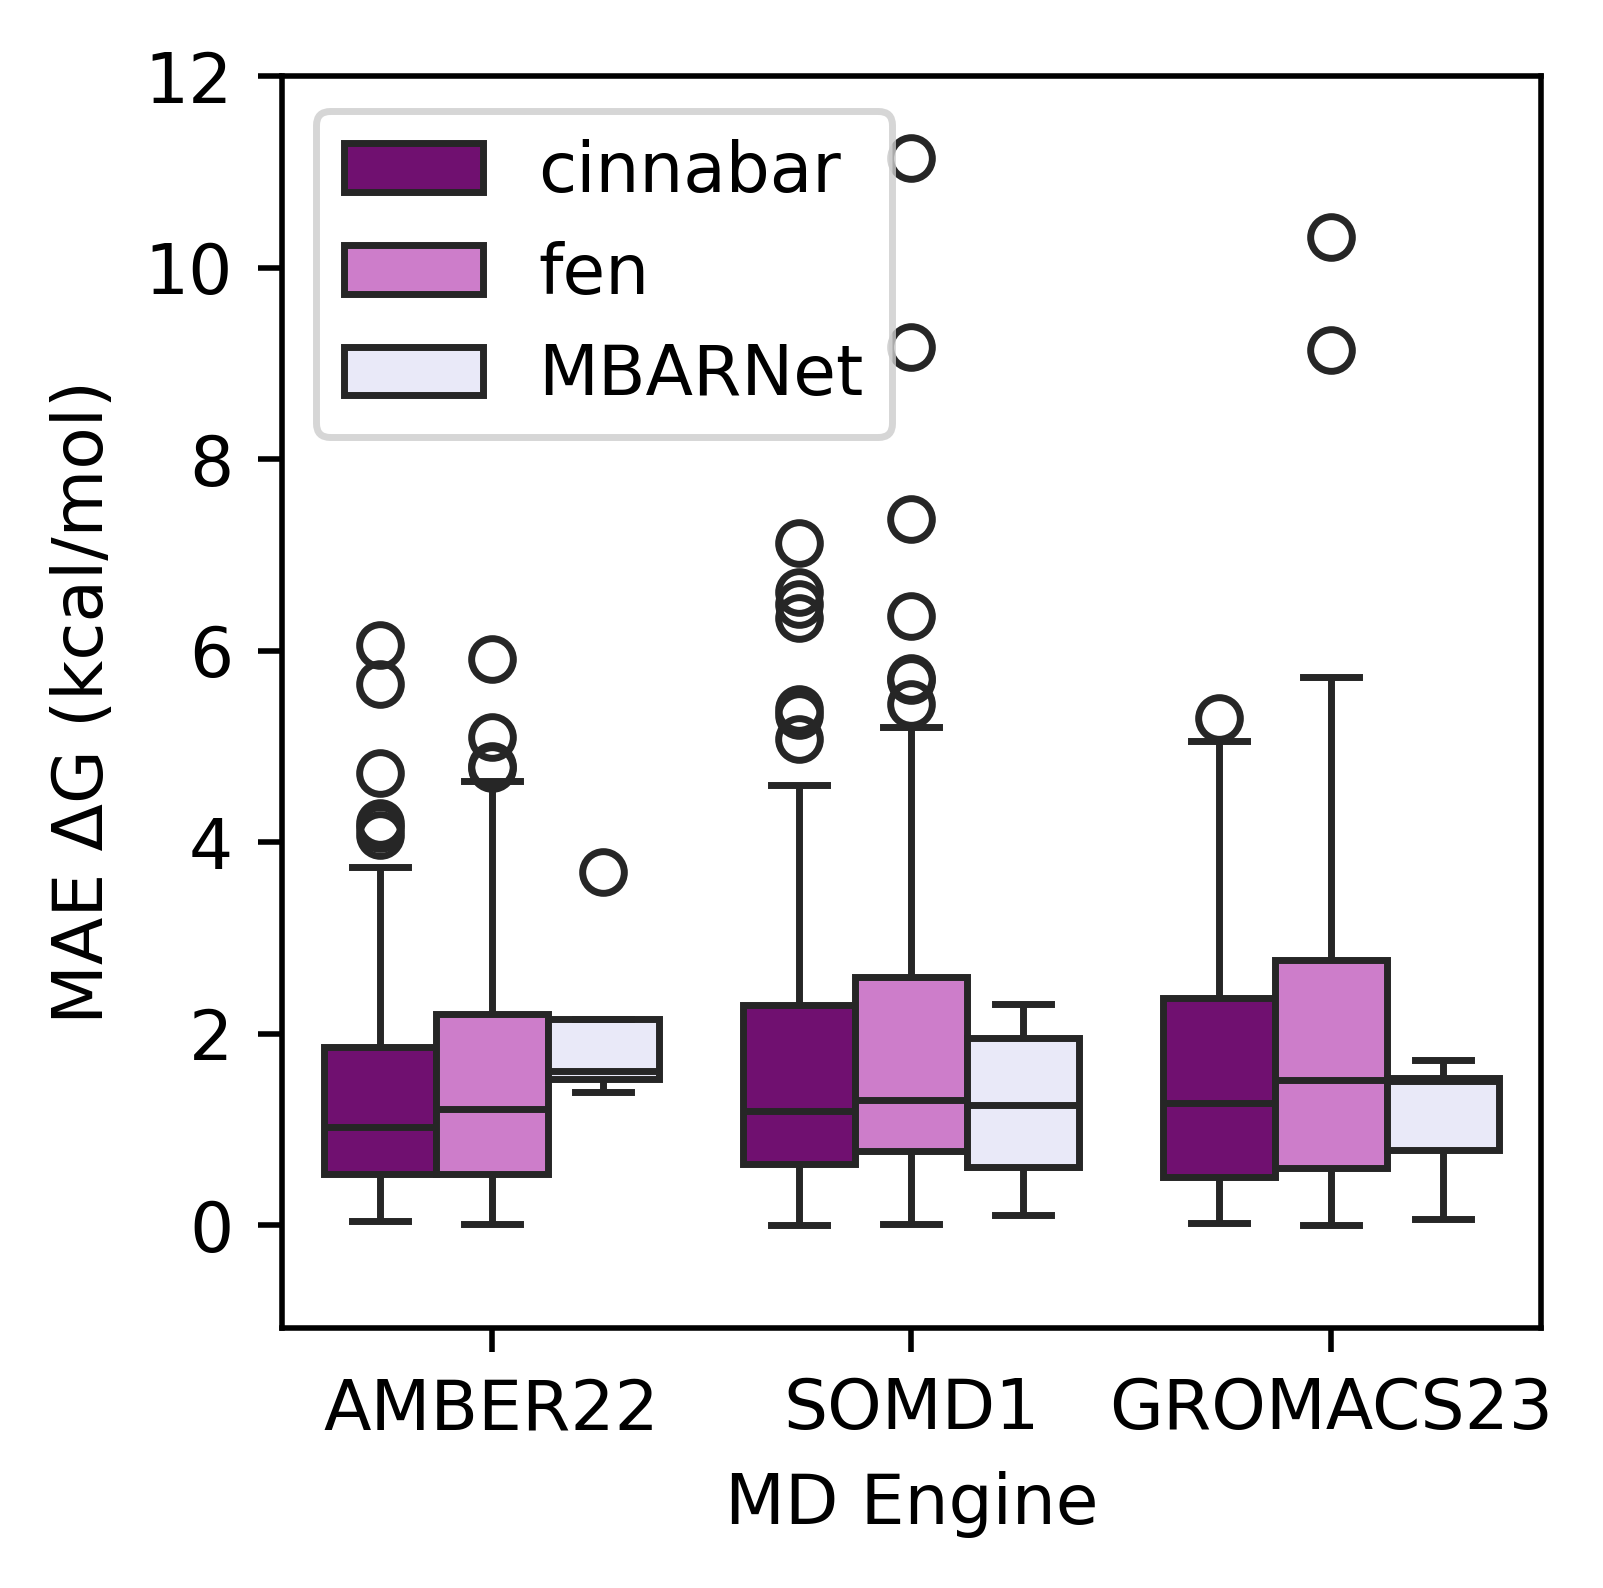

In [19]:
plotting_dict = {"method":flatten_comprehension(net_ana_method_dict["method"]),
                 "MD engine": flatten_comprehension(net_ana_method_dict["engine"]),
                 "MAE dG (kcal/mol)": flatten_comprehension(net_ana_method_dict["value"]),
                 "Protein": flatten_comprehension(net_ana_method_dict["protein"])}

fig, ax = plt.subplots(figsize=(3.25, 3.25), dpi=500)
df = pd.DataFrame(plotting_dict)
sns.boxplot(df, x="MD engine", y="MAE dG (kcal/mol)", hue="method", palette=["purple","orchid","lavender"], ax=ax)
#modify individual font size of elements
plt.legend(fontsize=10)
plt.xlabel('MD Engine', fontsize=10)
plt.ylabel('MAE ΔG (kcal/mol)', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)
ax.set_ylim(top=12)

AMBER
SOMD
GROMACS


/tmp/ipykernel_1529686/2712667763.py:19: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(df, x="Protein", y="MAE dG (kcal/mol)",


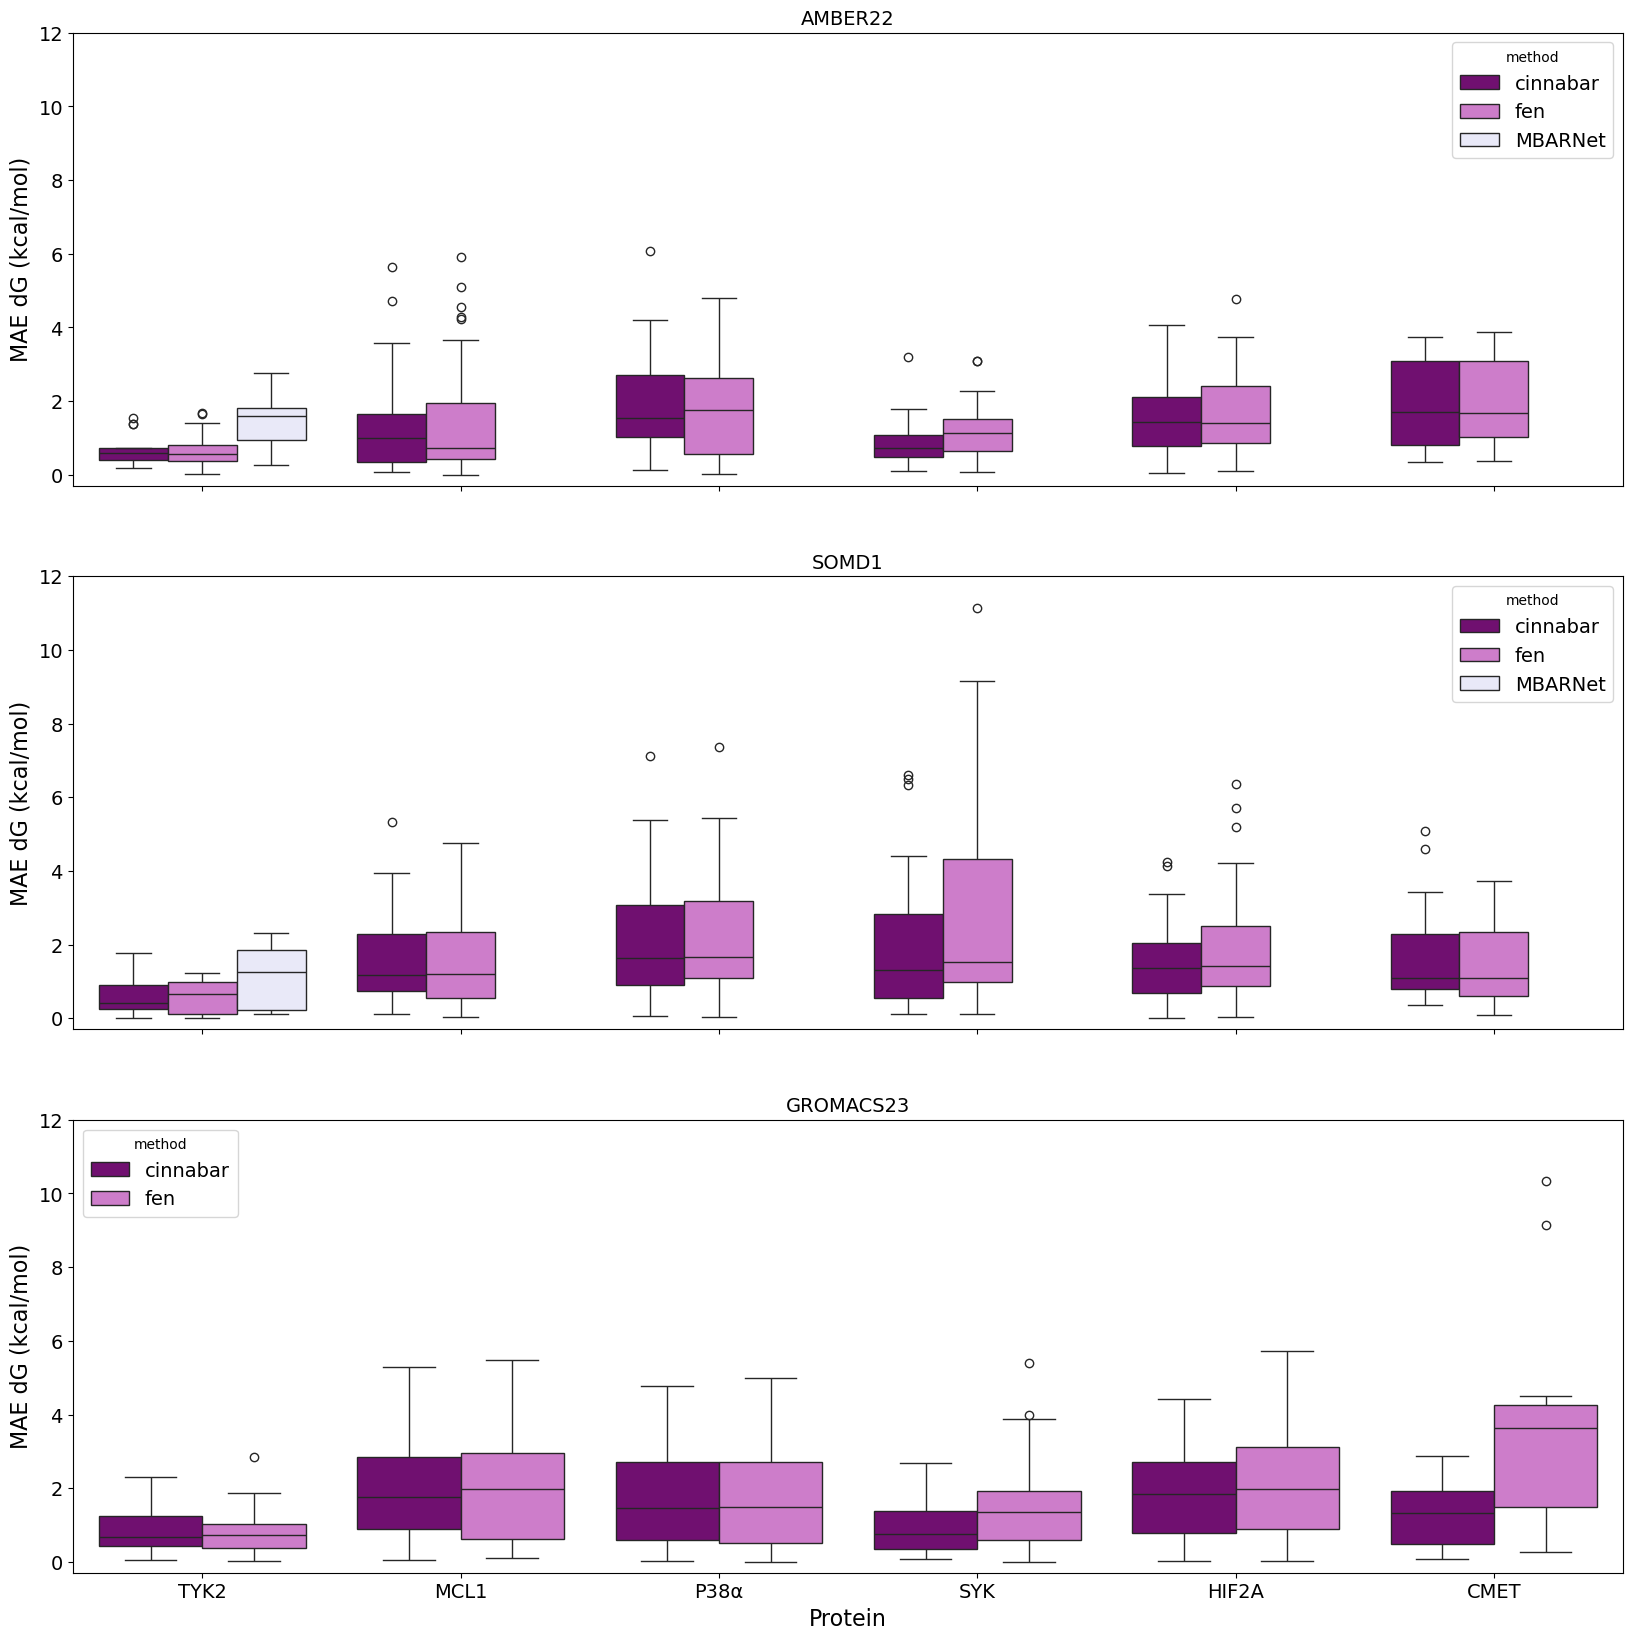

In [10]:
# plotting per system

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(
    20, 20), sharex=True, sharey=True)
plt.xlim = ()
plt.ylim = ()
for engine, pos in zip(ana_obj.engines, [axes[0], axes[1], axes[2]]):
    print(engine)
    plotting_dict = {"method":flatten_comprehension(net_ana_method_dict["method"]),
                 "MD engine": flatten_comprehension(net_ana_method_dict["engine"]),
                 "MAE dG (kcal/mol)": flatten_comprehension(net_ana_method_dict["value"]),
                 "Protein": flatten_comprehension(net_ana_method_dict["protein"]),
                 }
    
    df = pd.DataFrame(plotting_dict)
    for eng in [eng for eng in ana_obj.engines if eng != engine]:
        df.drop(df.loc[df['MD engine']==eng_dict_name[eng]].index, inplace=True)

    sns.boxplot(df, x="Protein", y="MAE dG (kcal/mol)",
                hue="method", palette=["purple","orchid","lavender"],
                ax=pos).set_title(eng_dict_name[engine])
    pos.set_ylim(top=12)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(
    25, 5), sharex=True, sharey=True)
plt.xlim = ()
plt.ylim = ()
for prot, pos in zip(ana_obj_dict.keys(), [axes[0], axes[1], axes[2], axes[3], axes[4], axes[5]]):

    plotting_dict = {"method":flatten_comprehension(net_ana_method_dict["method"]),
                 "MD engine": flatten_comprehension(net_ana_method_dict["engine"]),
                 "MAE dG (kcal/mol)": flatten_comprehension(net_ana_method_dict["value"]),
                 "Protein": flatten_comprehension(net_ana_method_dict["protein"]),
                 }
    
    df = pd.DataFrame(plotting_dict)
    for eng in [eng for eng in ana_obj_dict.keys() if eng != prot]:
        df.drop(df.loc[df['Protein']==eng].index, inplace=True)

    sns.boxplot(df, x="MD engine", y="MAE dG (kcal/mol)",
                hue="method", palette=["purple","orchid","lavender"],
                ax=pos, ).set_title(prot.upper())


In [ ]:
sns.barplot(df, x="Protein", y="MAE dG (kcal/mol)",
            hue="MD engine", palette=pipeline.analysis.set_colours().values())

In [ ]:
# consensus scoring
# for a single repeat for each engine
for r in [0,1,2]:
    print(r)
    consensus_name = f"consensus_exclusions_{r}"
    for prot in ana_obj_dict.keys():
        print(prot)
        ana_obj = network_dict["lomap"][prot]["subsampling"]
        pipeline.utils.validate.folder_path(
            f"{ana_obj.files_folder}/{consensus_name}", create=True)

        pert_dict = {}
        for eng in ana_obj.engines:
            pert_dict[eng] = []

        for pert in ana_obj.perturbations:
            
            vals = []
            for eng in ana_obj.engines:
                    try:
                        vals.append(ana_obj.calc_repeat_pert_dict[eng][r][pert][0])
                    except:
                        try:
                            vals.append(-ana_obj.calc_repeat_pert_dict[eng][r][f"{pert.split('~')[1]}~{pert.split('~')[0]}"][0])
                        except:
                            print(f"{pert} doesnt exist for {eng}")
            vals_mean = np.mean(vals)
            
            threshold_from_mean = 5

            for eng in ana_obj.engines:
                try:
                    if ana_obj.calc_pert_dict[eng][pert][0] < vals_mean+threshold_from_mean:
                        if ana_obj.calc_pert_dict[eng][pert][0] > vals_mean-threshold_from_mean:
                                    pert_dict[eng].append(pert)
                except:
                    print(prot, eng, pert)

        mod_results_files_list = []
        
        for eng in ana_obj.engines:
            mod_results_files = write_modified_results_files(results_files=ana_obj._results_repeat_files[eng][r],
                                            perturbations=pert_dict[eng],
                                            output_folder=f"{ana_obj.files_folder}/{consensus_name}",
                                            **{"engine":eng})
            print(mod_results_files)
            mod_results_files_list.append(mod_results_files)
        
        mod_results_files_list = flatten_comprehension(mod_results_files_list)
        print(mod_results_files_list)

        try:
            ana_obj.compute_other_results(mod_results_files_list, name=f"{consensus_name}", method=None)
        except:
            print(f"could not for {prot}")

In [ ]:
# consensus scoring
# for a single repeat for each engine, excluding one the furthest away from the mean
for r in [0,1,2]:
    print(r)
    consensus_name = f"consensus_closest_to_mean_{r}"
    for prot in ana_obj_dict.keys():
        print(prot)
        ana_obj = network_dict["lomap"][prot]["subsampling"]
        pipeline.utils.validate.folder_path(
            f"{ana_obj.files_folder}/{consensus_name}", create=True)

        pert_dict = {}
        for eng in ana_obj.engines:
            pert_dict[eng] = []

        for pert in ana_obj.perturbations:
            
            vals_ = []
            for eng in ana_obj.engines:
                    try:
                        vals_.append(ana_obj.calc_repeat_pert_dict[eng][r][pert][0])
                    except:
                        try:
                            vals_.append(-ana_obj.calc_repeat_pert_dict[eng][r][f"{pert.split('~')[1]}~{pert.split('~')[0]}"][0])
                        except:
                            print(f"{pert} doesnt exist for {eng}")
            
            vals = [val for val in vals if str(val) != "nan"]
            if len(vals) > 2:
                max_val = ([abs(val) for val in vals/np.mean(vals)]).index(max([abs(val) for val in vals/np.mean(vals)]))
                del vals[max_val]
            
            vals_mean = np.mean(vals)

        mod_results_files_list = []
        
        for eng in ana_obj.engines:
            mod_results_files = write_modified_results_files(results_files=ana_obj._results_repeat_files[eng][r],
                                            perturbations=pert_dict[eng],
                                            output_folder=f"{ana_obj.files_folder}/{consensus_name}",
                                            **{"engine":eng})
            print(mod_results_files)
            mod_results_files_list.append(mod_results_files)
        
        mod_results_files_list = flatten_comprehension(mod_results_files_list)
        print(mod_results_files_list)

        try:
            ana_obj.compute_other_results(mod_results_files_list, name=f"{consensus_name}", method=None)
        except:
            print(f"could not for {prot}")

In [ ]:
# consensus scoring 2
# picking the most similar from a euclidian similarity matrix

from scipy.spatial.distance import euclidean, pdist, squareform
def similarity_func(u, v):
    return 1/(1+euclidean(u,v))

for prot in ana_obj_dict.keys():
    print(prot)
    ana_obj = network_dict["lomap"][prot]["subsampling"]
    pipeline.utils.validate.folder_path(
        f"{ana_obj.files_folder}/consensus2", create=True)

    pert_dict = {}
    for eng in ana_obj.engines:
        pert_dict[eng] = []

    for pert in ana_obj.perturbations:
        pert_list = []
        eng_list = []
        for eng in ana_obj.engines:
            try:
                pert_list.append(ana_obj.calc_pert_dict[eng][pert][0])
                eng_list.append(eng)
            except:
                pass

        DF_var = pd.DataFrame.from_dict(
            {pert: pert_list})
        DF_var.index = eng_list
        if len(eng_list) < 3:
            for eng in DF_var.index:
                pert_dict[eng].append(pert)

        else:
            try:
                dists = pdist(DF_var, similarity_func)
                DF_euclid = squareform(dists)
                # 1,2 is SOMD,GROMACS
                # 0,1 is AMBER,SOMD
                # 0,2 is AMBER, GROMACS
                # pick the most similar
                max_dict = {DF_euclid[1][2]: ["SOMD", "GROMACS"],
                            DF_euclid[0][1]: ["AMBER", "SOMD"],
                            DF_euclid[0][2]: ["AMBER", "GROMACS"],}
                maximum_sim = max(max_dict.keys())
                for eng in max_dict[maximum_sim]:
                    pert_dict[eng].append(pert)
            except:
                # if val is missing, use the other two engines
                DF_var.dropna(inplace=True)
                for eng in DF_var.index:
                    pert_dict[eng].append(pert)

    mod_results_files_list = []

    for eng in ana_obj.engines:
        mod_results_files = write_modified_results_files(results_files=ana_obj._results_repeat_files[eng],
                                                            perturbations=pert_dict[eng],
                                                            name="consensus2",
                                                            output_folder=f"{ana_obj.files_folder}/consensus2",)
        mod_results_files_list.append(mod_results_files)

    mod_results_files_list = flatten_comprehension(mod_results_files_list)

    try:
        ana_obj.compute_other_results(mod_results_files_list, name="consensus2")
    except:
        print(f"could not for {prot}")

In [ ]:
# another consensus
# using amber and then if this fails replacing it w GROMACS
consensus_name = "AMBER_adjusted_SOMD"

for prot in ana_obj_dict.keys():        
    ana_obj = network_dict["lomap"][prot]["subsampling"]
    pipeline.utils.validate.folder_path(
        f"{ana_obj.files_folder}/{consensus_name}", create=True)
    
    keep_perts = [pert for pert in ana_obj._perturbations_dict["SOMD"]
                    if pert not in twofs_run_dict[prot]["AMBER"]+reverse_run_dict[prot]["AMBER"]]
    write_modified_results_files(results_files=ana_obj._results_repeat_files["AMBER"],
                                    perturbations=keep_perts,
                                    engine="AMBER",
                                #  name=consensus_name,
                                    output_folder=f"{ana_obj.files_folder}/{consensus_name}",)
    keep_perts = flatten_comprehension(
        [twofs_run_dict[prot]["AMBER"],reverse_run_dict[prot]["AMBER"]])

    write_modified_results_files(results_files=ana_obj._results_repeat_files["SOMD"],
                                    perturbations=keep_perts,
                                    engine="SOMD",
                                #  name=consensus_name,
                                    output_folder=f"{ana_obj.files_folder}/{consensus_name}",)
    
    mod_results_files_list =glob.glob(
        f"{ana_obj.files_folder}/{consensus_name}/*")

    ana_obj.compute_other_results(
        mod_results_files_list, name=consensus_name)
        

In [ ]:
for prot in ana_obj_dict.keys():
    ana_obj = network_dict["lomap"][prot]["subsampling"]
    for name in ana_obj.other_results_names:
        ana_obj.remove_outliers(name=name, threshold=10)
        

In [ ]:
# plot the new consensus results

mae_dict = {}

for name in ["subsampling"]: #ana_dicts:
    
    mae_dict[name] = {}

    for prot in ana_obj_dict.keys():        
        print(prot, name)
    
        mae_dict[name][prot] = {}
        
        ana_obj = network_dict["lomap"][prot][name]
        try:
            mae = ana_obj.calc_mae_engines(pert_val="val", recalculate=True)
            for eng in ana_obj.engines + ana_obj.other_results_names:
                mae_dict[name][prot][eng] = (mae[0][eng]['experimental'], mae[1][eng]['experimental'], mae[2][eng]['experimental'])
        except Exception as e:
            print(e)

In [ ]:
pipeline.analysis.set_colours()

In [ ]:
# one graph for one method but that compared for each protein
plotting_dict = mae_dict  # mae_dict or sem_dict
stats_name = "kendalls tau"  # MAE or SEM

name = "subsampling"
df = pd.DataFrame(plotting_dict[name]).applymap(lambda x: x[0]).rename(eng_dict_name).T.rename(prot_dict_name)
df_err = pd.DataFrame(plotting_dict[name]).applymap(lambda x: x[2]).rename(eng_dict_name).T.rename(prot_dict_name)
df_lower = df_err.applymap(lambda x: x[0])
df_upper = df_err.applymap(lambda x: x[1])
df_err = (df_upper - df_lower)/2

# df.drop(["AMBER_adjusted_GROMACS"], axis=1, inplace=True)
# df_err.drop(["AMBER_adjusted_GROMACS"], axis=1, inplace=True)
fig, ax = plt.subplots(figsize=(3.25,3.25))

ax = df.plot(kind="bar",
        color={'AMBER22': 'orange',
                'SOMD1': 'darkturquoise',
                'GROMACS23': 'orchid',
                'experimental': 'midnightblue'},
        xlabel="protein system",
        ylabel=f"{stats_name} (kcal/mol)",
        yerr=df_err,
        ax=ax
        )
plt.legend(fontsize=10)
plt.xlabel('Protein System', fontsize=12)
plt.ylabel('ΔG MAE (kcal/mol)', fontsize=12)
plt.tick_params(axis="x",labelsize=10, rotation=45)
plt.tick_params(axis="y",labelsize=10)

In [ ]:
# also consider other stats like correlation etc


In [ ]:
# check maximum possible accuracy
r2_dict = {}
r2_error_dict = {}
for prot in ana_obj_dict.keys():
    r2_dict[prot] = {}
    r2_error_dict[prot] = {}
    print(prot)
    ana_obj = ana_obj_dict[prot]["plain"]
    print(len(ana_obj.ligands))
    print(max(ana_obj.exper_val_dict.values()), min(ana_obj.exper_val_dict.values()))
    print((np.mean([val[1] for val in ana_obj.exper_val_dict.values()])) , (np.std([val[0] for val in ana_obj.exper_val_dict.values()])))
    # experimental uncertainty is std of measurement error
    r2max = 1 - ((np.mean([val[1] for val in ana_obj.exper_val_dict.values()])) / (np.std([val[0] for val in ana_obj.exper_val_dict.values()])))**2
    print(r2max)
    r2_dict[prot]["maximum"] = r2max
    r2_error_dict[prot]["maximum"] = (0,0)

    df, df_err, df_ci = ana_obj.calc_r2_engines(pert_val="val", recalculate=True)
    for eng in ana_obj.engines:
        r2_dict[prot][eng] = df[eng]["experimental"]
        r2_error_dict[prot][eng] = df_ci[eng]["experimental"]
    


In [ ]:
# plot histograms
for prot in ana_obj_dict.keys():
    for name in ana_dicts:
        ana_obj = ana_obj_dict[prot][name]

        ana_obj.plot_histogram_legs()
        ana_obj.plot_histogram_repeats()
        ana_obj.plot_histogram_sem(pert_val="pert")
        ana_obj.plot_histogram_sem(pert_val="val")

In [ ]:
# To visualise the whole network, this can also be drawn seperately as a network object.
#`networkx_layout_func` can be used as an argument in `graph.draw_graph(networkx_layout_func = nx.circular_layout)`
# to change the layout of the drawn network. 

# for prot in ana_obj_dict.keys():

#     print(prot)

all_analysis_object = ana_obj_dict["syk"]["plain"]

graph = network_graph(
    all_analysis_object.ligands,
    all_analysis_object.perturbations,
    ligands_folder=all_analysis_object.ligands_folder,
    file_dir="/home/anna/Downloads/images",
)

df = pd.DataFrame(index=graph.graph.nodes(), columns=graph.graph.nodes())
for row, data in nx.shortest_path_length(graph.graph):
    for col, dist in data.items():
        df.loc[row,col] = dist

df = df.fillna(df.max().max())

layout_dict = {"dist":df.to_dict()} # kamada kawaii layout

# layout_dict = {"k":0.3*1/np.sqrt(len(graph.graph.nodes())), "iterations":10} # spring layout
# layout_dict = {}

graph.draw_graph( # figsize=(31,31), networkx_layout_func = nx.kamada_kawai_layout, layout_func_kwargs=layout_dict, file_dir="/home/anna/Downloads", title=" ",
                 dot_graph=True
                 )
# graph.draw_all_ligands(figsize=(20,20))